We randomly generate many samples (tokens) to construct a series of random input prompts. For each layer of each of the 12 blocks in the transformer we compute the Activation Covariance Matrix with the objective is to compare its eigenvectors to the right singular vectors of weight matrix.

Why? Because we want to assess how the weight matrix geometrically transforms the buffer within layers and within blocks. By computing the overlap between the eigenvectors of the ACM and the right singular vectors of the weight matrix we expect to be able to visualise  whether the weight matrix is directly acting on the buffer by amplifying or dumping some directions or not really affecting the geometry of the buffer in this sense. What we see is consistency in the results among the same layers (attention W_Q, W_K,and W_V, and projection matrices, and MLP up- and down-projection matrices) within different blocks. We also notice that in the later blocks, the down projection matrix seems to have an overall dumping effect on the buffer, perhaps consistent with the fact that in the last block the buffer  ultimately transforms to give, located in the last position, the output token.

## Overlap Analysis 

Consider the buffer vector $x^{(\ell)}\in\R^m$, where $m$ is the number of tokens, and the superscript denotes the input to layer $\ell$.Our embedding space size is $n$, then each embedded token is an $n$-dimensional column vector $x_i\in\R^n$, with $\{i\}_1^m$ refering to the $i$-th token in the buffer.

The Activation Covariance Matrix (ACM) is defined as follows:
$$
F^{(\ell)}
= \mathrm{Cov}(x)
= \frac{1}{N}\sum_{i=1}^N (x_i - \bar x)\,(x_i - \bar x)^T
\;\in\R^{n\times n}.
$$

The weight matrix SVD is the following:
$$
W^{(\ell)} \;=\; U^{(\ell)}\,S^{(\ell)}\,V^{(\ell)T},
\quad
U^{(\ell)}\in\R^{m\times r},\;
S^{(\ell)}\in\R^{r\times r},\;
V^{(\ell)}\in\R^{n\times r},
$$
where
+ $r=\min(m,n)$ is the rank,
+ the columns of $V^{(\ell)}$, denoted $v_k^{(\ell)}$, of size $n$, are the $r$ right singular vectors in input space,
+ $S^{(\ell)}$ is diagonal with nonnegative entries $\sigma_1\ge\sigma_2\ge\cdots \ge\sigma_r$,
+ the columns of $U^{(\ell)}$ are the left singular vectors in output space.

The ACM is a $n \times n$ symmetric matrix whose eigen‐decomposition gives
$$
F^{(\ell)}\,f_j^{(\ell)} \;=\;\lambda_j\,f_j^{(\ell)},
\quad
f_j^{(\ell)}\in\R^n,\;\lambda_1\ge\lambda_2\ge\cdots\ge0,
$$

with $j = 1,...,n$.

We want to compute the overlap, as the maximum value of the product for each singular‐vector index $k=1,\dots,r$,

$$O_k^{(\ell)} = \max_{j=1,\dots,r} \bigl\langle v_k^{(\ell,s)},\;f_j^{(\ell)}\bigr\rangle,$$
where $\{f_j^{(\ell)}\}$ are the eigenvectors of $F^{(\ell)}$, reshaped with respect to the descending order of eigenvalues and sliced up to the rank $r$ of $W$. 

Informally, the objective is to answer the question:

    "Of all the directions in the layer’s input space that the weight matrix could amplify or attenuate, which ones does the data actually occupy?"

Since the transformation in layer $\ell$ is given by $W^{(\ell)} x^{(\ell)}+b^{(\ell)}$, we define the new coordinates
$
y \;=\; V^{(\ell)T}\,x^{(\ell)}.
$

In these coordinates, the $k$-th entry $y_k$ is exactly the projection
$\langle v_k^{(\ell)},\,x\rangle$ of $x$ onto the $k$-th right singular vector.

If we compute the covariance of the random vector $y$ then, by definition,
$
\mathrm{Cov}(y)
= \mathbb{E}\bigl[\,(y - \mathbb{E}[y])\,(y - \mathbb{E}[y])^T\,\bigr].
$

with $y=V^Tx$. 

Using the standard fact that for any fixed matrix $A$, $\mathrm{Cov}(A\,x)=A\,\mathrm{Cov}(x)\,A^T,$ we get
$$
\widetilde F
= \mathrm{Cov}(y)
= V^{(\ell)T}\,\mathrm{Cov}(x)\,V^{(\ell)}
= V^{(\ell)T}\,F^{(\ell)}\,V^{(\ell)}.
$$

Then, $\widetilde F$ is still an $n\times n$ symmetric matrix and it is a similarity transform of $F^{(\ell)}$. Similarity transforms preserve eigenvalues and simply rotate eigenvectors.

If
$
F^{(\ell)}\,f_j^{(\ell)}=\lambda_j\,f_j^{(\ell)},$
then
$\widetilde F\;
\bigl(V^{(\ell)T}f_j^{(\ell)}\bigr)
= V^{(\ell)T}\,F^{(\ell)}\,f_j^{(\ell)}
= \lambda_j\,\bigl(V^{(\ell)T}f_j^{(\ell)}\bigr).$

Hence the eigenpairs of $\widetilde F$ are
$
\bigl(\lambda_j,\;V^{(\ell)T}f_j^{(\ell)}\bigr).$

That is, each original principal direction $f_j^{(\ell)}$ is now expressed in the $V$-basis by the vector $V^Tf_j$. (Notice that $V^Tf_j$ gives the overlap of each $v_k$ right-vector with the $j$-th eigenvector of the ACM $f_j$.)

In the $y$-coordinates, the right singular vectors $v_k^{(\ell)}$ map to the standard basis:

$
V^T\,v_k = e_k,
$
where 
$
e_k\in\R^n
$
has $1$ in position $k$ and $0$ elsewhere.

Thus, when we ask for the overlap
$
\bigl\langle v_k^{(\ell)},\,f_j^{(\ell)}\bigr\rangle
= v_k^{(\ell)T}\,f_j^{(\ell)},$
we are equivalently asking in the new basis $e_k$ what is the $k$-th coordinate of the $j$-th principal component in the $V$-basis.

The overlap $O_k^{(\ell)}$ on each $k$-th new coordinate can be interepreted as follows:
+ The right singular vectors $v_k^{(\ell)}$ are the axes along which $W^{(\ell)}$ scales inputs by $\sigma_k$.
+ The covariance eigenvectors $f_j^{(\ell)}$ are the axes along which the data intrinsically varies.
+ Their overlap measures how much each potential amplification axis $v_k$ coincides with a real data axis $f_j$.
+ If a direction $v_k\in V$ has high overlap with one of the $f_j$, then whenever the transformer visits that feature‐axis in its input, $W$ has a large singular value to amplify it (or a small one to suppress it).
+ Conversely, if $v_k$ is orthogonal to all $f_j$, the model never sees data in that direction, so that axis of $W$ is essentially unused.

The overlap directly measures weight anisotropy relative to the data distribution, that is $W$ does not treat every direction in its input space equally, but instead stretches some directions more than others
+ A large $O_k$ means $v_k$ aligns with a direction of high data variance, so that axis of $W$ is in active use.
+ A small $O_k$ means $v_k$ points into a direction where the model rarely ventures.
+ Where in the transformer new feature directions emerge could be pointed out by outlier singular values.

## Derivation of Marchenko Pastur for Singular Value Decomposition

Let $X\in\R^{m\times n}$ have i.i.d. entries with zero mean and variance $\sigma^2$. One can form the (scaled) sample covariance
$$
\begin{equation*}
C \;=\;\frac1n\,X\,X^T
\;\in\;\R^{m\times m}.
\end{equation*}
$$.

As $m,n\to\infty$ with the ratio $q = \frac{m}{n}\;\;(0<q\le1)$ fixed, the empirical eigenvalue distribution of $C$ converges to the Marchenko–Pastur law with support $\lambda_\pm^{(\rm cov)}\;=\;\sigma^2\bigl(1\pm\sqrt{q}\bigr)^2,$ meaning that nearly all eigenvalues of $C$ lie in
$$
\begin{equation*}
\bigl[\sigma^2(1-\sqrt q)^2,\;\sigma^2(1+\sqrt q)^2\bigr]
\end{equation*}
$$.

The nonzero singular values of $X$ are the square-roots of the nonzero eigenvalues of $XX^T$, i.e., let $\{\lambda_i\}$ be the eigenvalues of $C = \tfrac1n\,X X^T$,then the corresponding singular values of $X$ are $s_i(X)\;=\;\sqrt{\,n\,\lambda_i\,}\,$.
Thus the support of the singular-value distribution of $X$ is
$$
\begin{equation*}
s_\pm
=\sqrt{\,n\,\lambda_\pm^{(\rm cov)}\,}
=\sqrt{\,n\,\sigma^2\bigl(1\pm\sqrt q\bigr)^2\,}
=\sigma\;\sqrt n\;\bigl(1\pm\sqrt q\bigr).
\end{equation*}
$$.

Center $W$ and compute $\sigma^2=\tfrac1{mn}\sum_{i,j}W_{ij}^2$ as the empirical variance of $W_{centered}$. Set 
$$
\begin{equation*}
s_- = \sigma\bigl|\sqrt n - \sqrt m\bigr|,\quad
s_+ = \sigma\bigl(\sqrt n + \sqrt m\bigr),
\end{equation*}
$$
then any empirical singular values $s_k$ outside $[s_-,s_+]$ will be outliers relative to the random baseline for that weight matrix $W$.

Given that the (nonzero) eigenvalues $\{\lambda_i\}$ of $C$ in the large-$m,n$ limit have density
$$
\begin{equation*}
p_C(\lambda)
=\frac{1}{2\pi\,\sigma^2\,q\,\lambda}
\sqrt{(\lambda_+^{(\rm cov)}-\lambda)\,(\lambda-\lambda_-^{(\rm cov)})},
\end{equation*}
$$
and that the nonzero singular values $s_i$ of $W_{centered}$ relate by
$$
\begin{equation*}
s_i = \sqrt{\lambda_i},
\end{equation*}
$$
so the density $p_s(s)$ satisfies
$$
\begin{equation*}
p_s(s)\,ds \;=\; p_C(\lambda)\,d\lambda
\quad\text{with}\quad
\lambda = s^2,\quad d\lambda = 2s\,ds.
\end{equation*}
$$
then
$$
\begin{equation*}
p_s(s)
= p_C(s^2)\;\Bigl|\frac{d\lambda}{ds}\Bigr|
= 2s\;p_C(s^2)
= \frac{2s}{2\pi\,\sigma^2\,q\,s^2}
\sqrt{\bigl(\lambda_+^{(\rm cov)}-s^2\bigr)\,\bigl(s^2-\lambda_-^{(\rm cov)}\bigr)},
\end{equation*}
$$.
Then the Marchenko–Pastur distribution for each weight matrix follows:
$$
\begin{equation*}
\boxed{
p_s(s)
= \frac{1}{\pi\,\sigma^2\,q\,s}
\sqrt{\bigl(s_-^2 - s^2\bigr)\,\bigl(s^2- s_+^2\bigr)},
}
\end{equation*}
$$.
supported on $s\in[s_-,s_+]$.

By checking for right singular vectors whose associate values reside outside those boundaries we can assess in each layer which directions significantly affect the orientation of the incoming buffer.

In [1]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('..')))

import matplotlib.pyplot as plt
import numpy as np

import torch

from transformers import GPT2Tokenizer, GPT2LMHeadModel

from transformer_geometrical_analysis.utils.retrieval import get_activations, extract_weights


In [2]:
gpt2_version = "openai-community/gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(gpt2_version)
model = GPT2LMHeadModel.from_pretrained(gpt2_version, output_hidden_states=True, return_dict_in_generate=True)

In [ ]:
# constants of the model
TOTAL_VOCAB_SIZE = tokenizer.vocab_size
MAXIMUM_INPUT_LENGTH = 1024
N_BLOCKS = 12
TOTAL_VOCAB_SIZE

50257

In [4]:
model.eval()

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D(nf=2304, nx=768)
          (c_proj): Conv1D(nf=768, nx=768)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=3072, nx=768)
          (c_proj): Conv1D(nf=768, nx=3072)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

In [ ]:
with open("input_phrases copy.txt", "r") as f:
    prompts = [line.strip() for line in f if line.strip()]
print(len(model.transformer.h))

12


In [ ]:
# register hooks once: initialization
activations = get_activations(model)
num_blocks = len(model.transformer.h)
d = model.config.hidden_size
# generating random prompts of a fixed token size
n_tokens = 100
n_prompts = 100
prompts = [torch.randint(0, TOTAL_VOCAB_SIZE, size = (1, n_tokens)) for _ in range(n_prompts)]
# registering the hooks and initializing the dict to store all activations
activations = get_activations(model)
# runnning all the prompts to obtain all activations
for prompt in prompts:
    with torch.no_grad():
        _ = model(prompt)
# extracting all the weights from the transformer
weights = extract_weights(model)

#####

BLOCK 0

#####

------------------------------

attn.c_attn.q shape: (768, 768)
buffer shape: (100, 600, 768)
cov mat shape: (768, 768)     eig vecs shape: (768, 768)
max rank: 768
svals shape: (768,)     rvecs shape: (768, 768)
# overlaps: (768,)
  attn.c_attn.q: 5.34% above ν+ = 13.23,	0.00% below ν− = 0.00


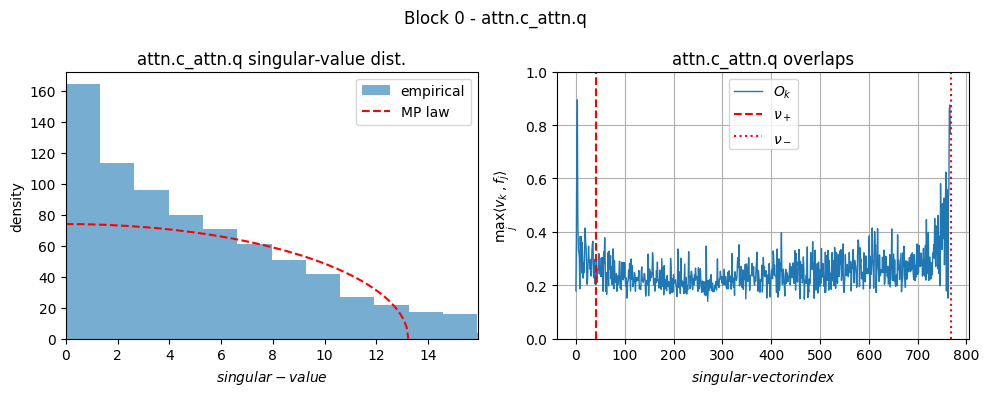

------------------------------

attn.c_attn.k shape: (768, 768)
buffer shape: (100, 600, 768)
cov mat shape: (768, 768)     eig vecs shape: (768, 768)
max rank: 768
svals shape: (768,)     rvecs shape: (768, 768)
# overlaps: (768,)
  attn.c_attn.k: 5.99% above ν+ = 13.48,	0.00% below ν− = 0.00


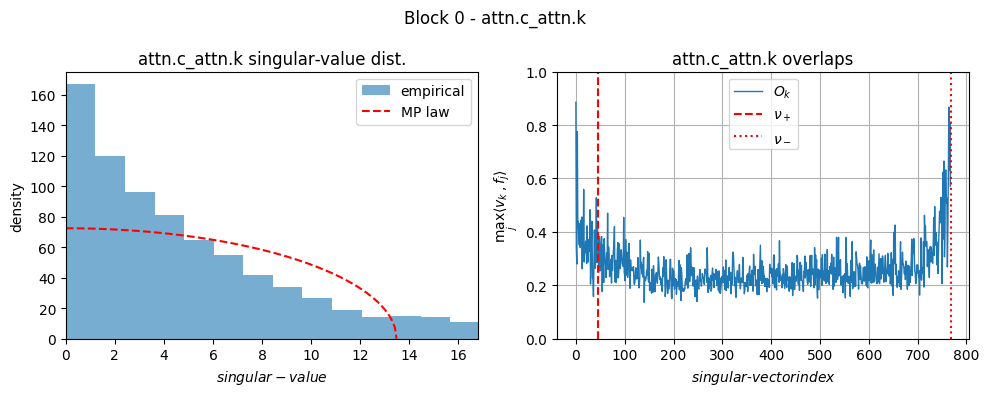

------------------------------

attn.c_attn.v shape: (768, 768)
buffer shape: (100, 600, 768)
cov mat shape: (768, 768)     eig vecs shape: (768, 768)
max rank: 768
svals shape: (768,)     rvecs shape: (768, 768)
# overlaps: (768,)
  attn.c_attn.v: 3.52% above ν+ = 3.22,	0.00% below ν− = 0.00


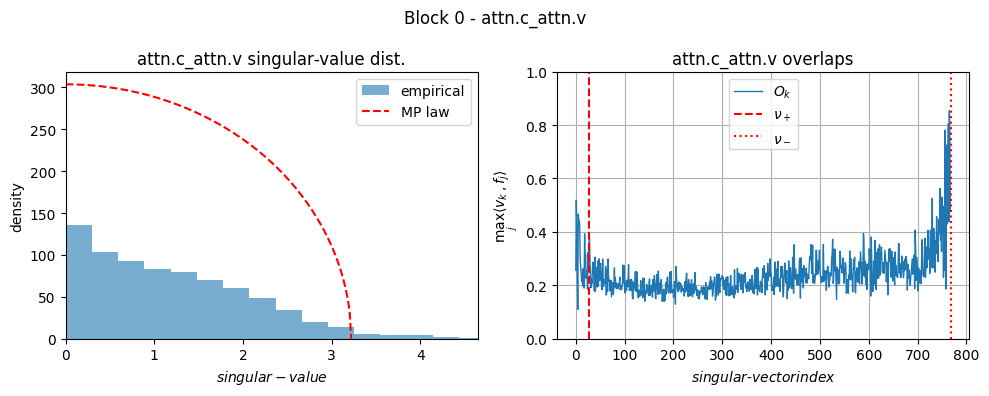

------------------------------

attn.c_proj shape: (768, 768)
buffer shape: (100, 600, 768)
cov mat shape: (768, 768)     eig vecs shape: (768, 768)
max rank: 768
svals shape: (768,)     rvecs shape: (768, 768)
# overlaps: (768,)
  attn.c_proj: 5.99% above ν+ = 8.17,	0.00% below ν− = 0.00


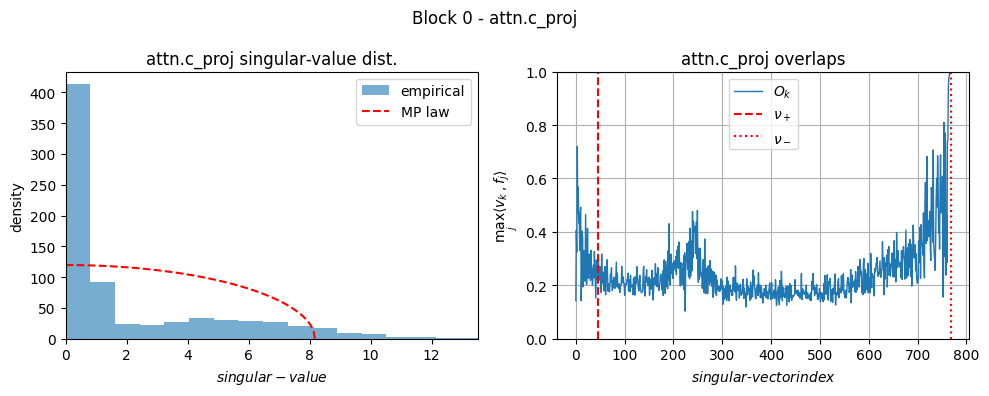

------------------------------

mlp.c_fc shape: (768, 3072)
buffer shape: (100, 600, 3072)
cov mat shape: (3072, 3072)     eig vecs shape: (3072, 3072)
max rank: 768
svals shape: (768,)     rvecs shape: (3072, 768)
# overlaps: (768,)
  mlp.c_fc: 6.12% above ν+ = 11.74,	14.58% below ν− = 3.91


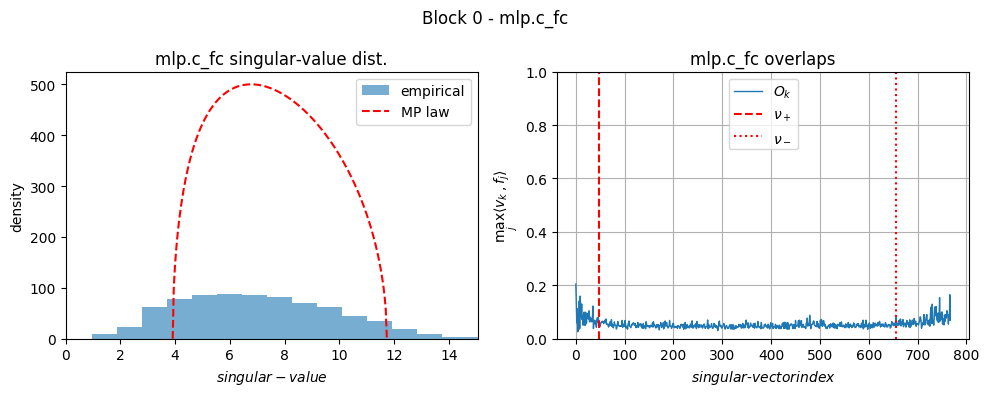

------------------------------

mlp.c_proj shape: (3072, 768)
buffer shape: (100, 600, 768)
cov mat shape: (768, 768)     eig vecs shape: (768, 768)
max rank: 768
svals shape: (768,)     rvecs shape: (768, 768)
# overlaps: (768,)
  mlp.c_proj: 3.78% above ν+ = 7.31,	12.76% below ν− = 2.44


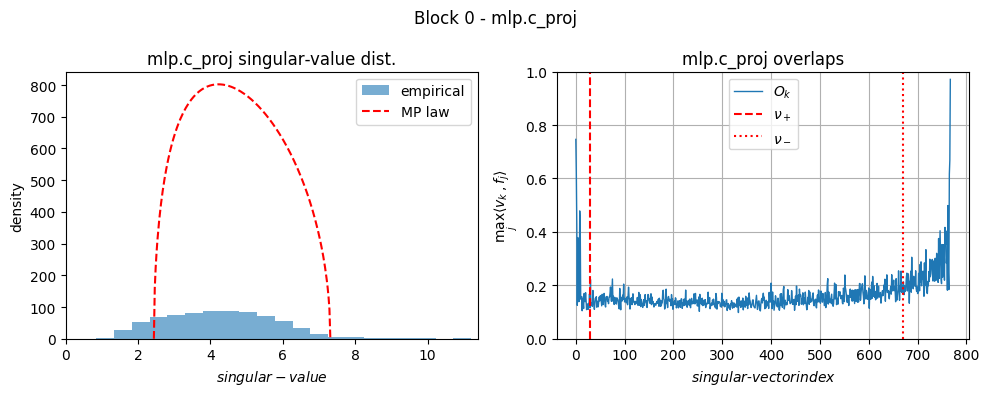

#####

BLOCK 1

#####

------------------------------

attn.c_attn.q shape: (768, 768)
buffer shape: (100, 600, 768)
cov mat shape: (768, 768)     eig vecs shape: (768, 768)
max rank: 768
svals shape: (768,)     rvecs shape: (768, 768)
# overlaps: (768,)
  attn.c_attn.q: 6.25% above ν+ = 8.37,	0.00% below ν− = 0.00


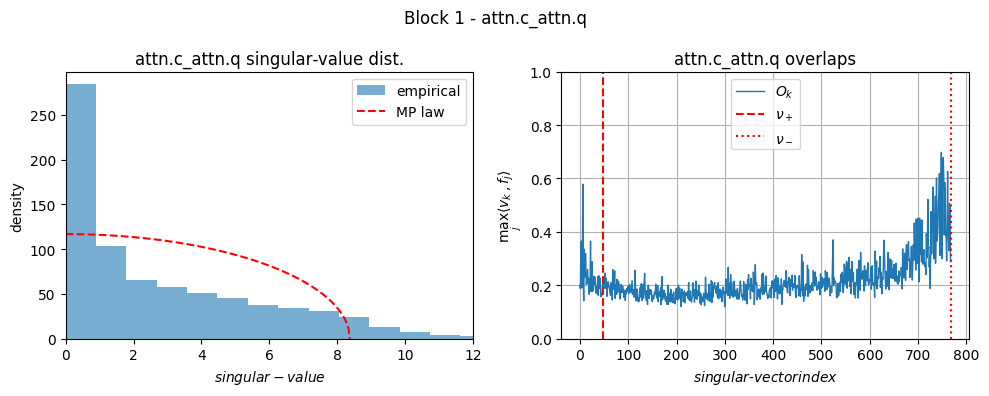

------------------------------

attn.c_attn.k shape: (768, 768)
buffer shape: (100, 600, 768)
cov mat shape: (768, 768)     eig vecs shape: (768, 768)
max rank: 768
svals shape: (768,)     rvecs shape: (768, 768)
# overlaps: (768,)
  attn.c_attn.k: 5.08% above ν+ = 8.81,	0.00% below ν− = 0.00


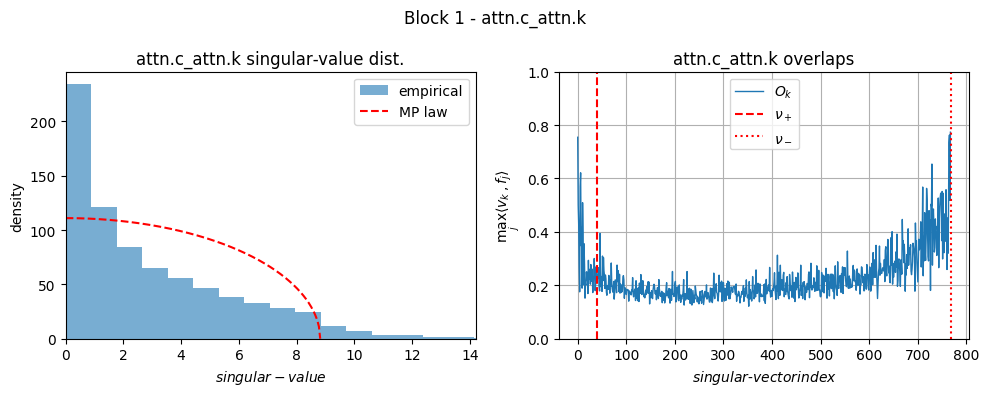

------------------------------

attn.c_attn.v shape: (768, 768)
buffer shape: (100, 600, 768)
cov mat shape: (768, 768)     eig vecs shape: (768, 768)
max rank: 768
svals shape: (768,)     rvecs shape: (768, 768)
# overlaps: (768,)
  attn.c_attn.v: 4.95% above ν+ = 5.75,	0.00% below ν− = 0.00


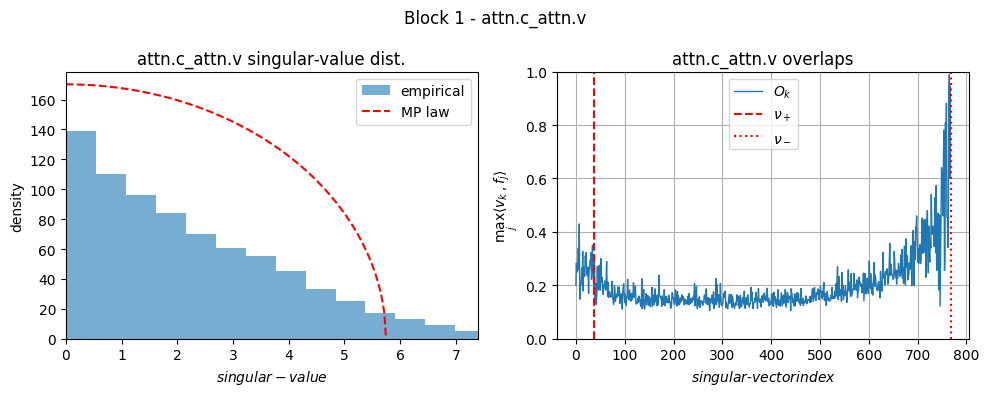

------------------------------

attn.c_proj shape: (768, 768)
buffer shape: (100, 600, 768)
cov mat shape: (768, 768)     eig vecs shape: (768, 768)
max rank: 768
svals shape: (768,)     rvecs shape: (768, 768)
# overlaps: (768,)
  attn.c_proj: 2.60% above ν+ = 5.65,	0.00% below ν− = 0.00


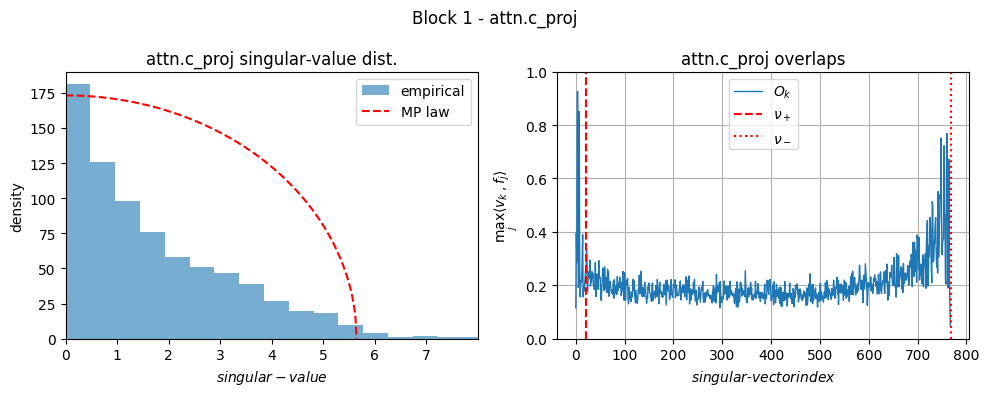

------------------------------

mlp.c_fc shape: (768, 3072)
buffer shape: (100, 600, 3072)
cov mat shape: (3072, 3072)     eig vecs shape: (3072, 3072)
max rank: 768
svals shape: (768,)     rvecs shape: (3072, 768)
# overlaps: (768,)
  mlp.c_fc: 5.86% above ν+ = 10.87,	6.77% below ν− = 3.62


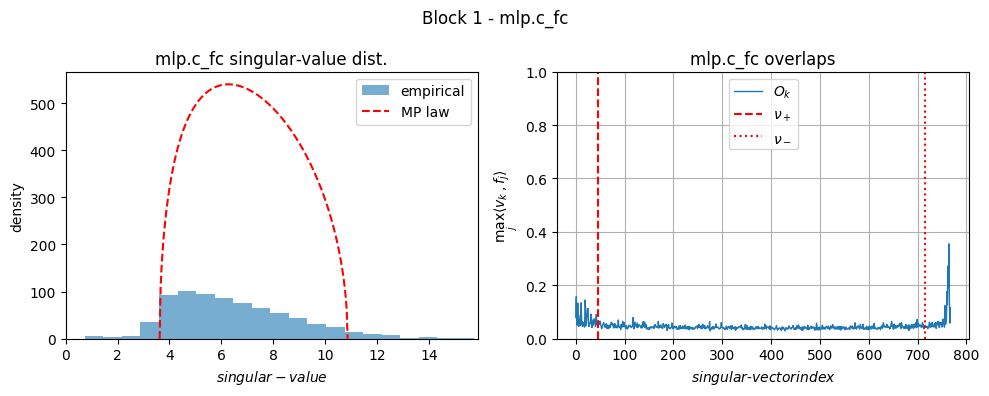

------------------------------

mlp.c_proj shape: (3072, 768)
buffer shape: (100, 600, 768)
cov mat shape: (768, 768)     eig vecs shape: (768, 768)
max rank: 768
svals shape: (768,)     rvecs shape: (768, 768)
# overlaps: (768,)
  mlp.c_proj: 3.26% above ν+ = 7.25,	6.77% below ν− = 2.42


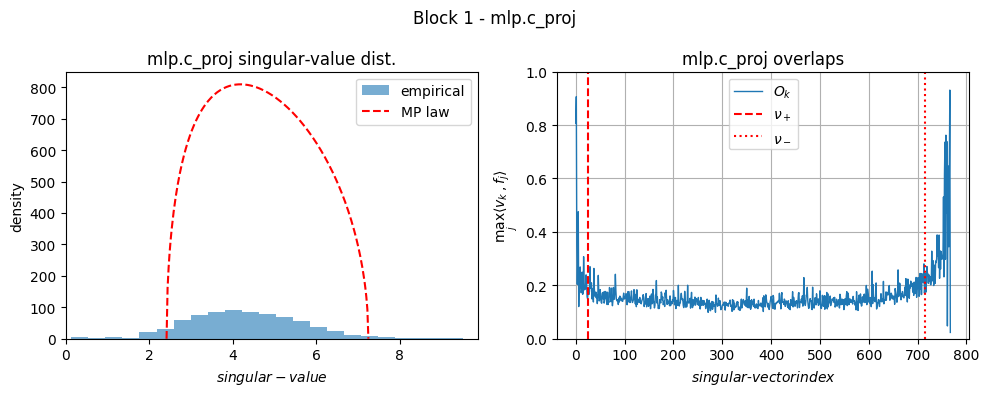

#####

BLOCK 2

#####

------------------------------

attn.c_attn.q shape: (768, 768)
buffer shape: (100, 600, 768)
cov mat shape: (768, 768)     eig vecs shape: (768, 768)
max rank: 768
svals shape: (768,)     rvecs shape: (768, 768)
# overlaps: (768,)
  attn.c_attn.q: 5.34% above ν+ = 10.49,	0.00% below ν− = 0.00


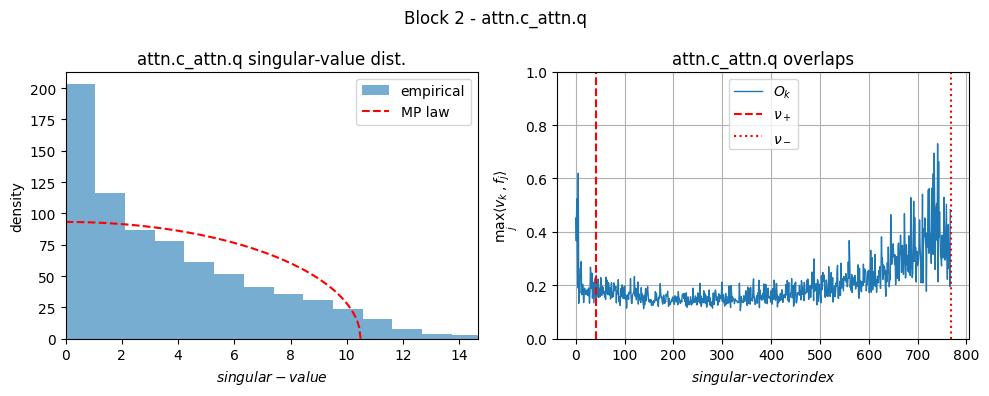

------------------------------

attn.c_attn.k shape: (768, 768)
buffer shape: (100, 600, 768)
cov mat shape: (768, 768)     eig vecs shape: (768, 768)
max rank: 768
svals shape: (768,)     rvecs shape: (768, 768)
# overlaps: (768,)
  attn.c_attn.k: 3.65% above ν+ = 8.41,	0.00% below ν− = 0.00


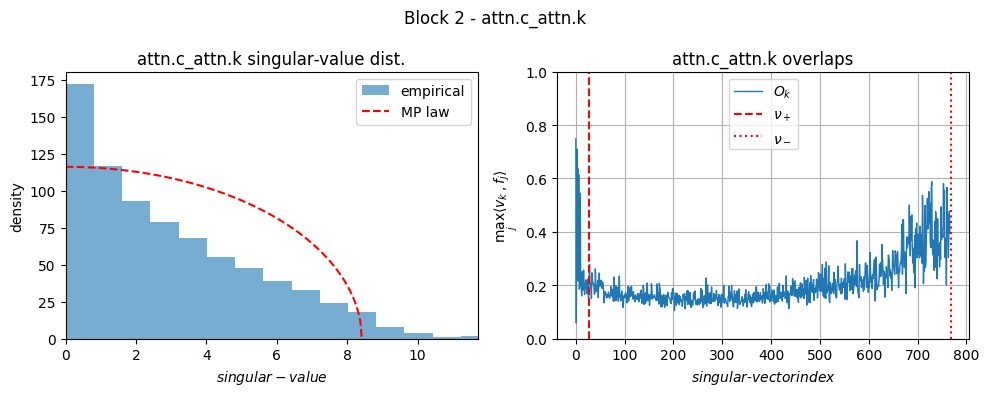

------------------------------

attn.c_attn.v shape: (768, 768)
buffer shape: (100, 600, 768)
cov mat shape: (768, 768)     eig vecs shape: (768, 768)
max rank: 768
svals shape: (768,)     rvecs shape: (768, 768)
# overlaps: (768,)
  attn.c_attn.v: 4.56% above ν+ = 5.82,	0.00% below ν− = 0.00


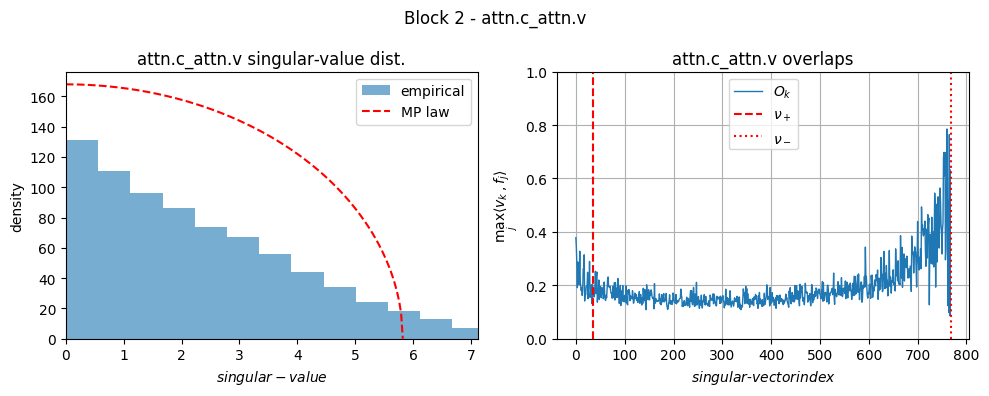

------------------------------

attn.c_proj shape: (768, 768)
buffer shape: (100, 600, 768)
cov mat shape: (768, 768)     eig vecs shape: (768, 768)
max rank: 768
svals shape: (768,)     rvecs shape: (768, 768)
# overlaps: (768,)
  attn.c_proj: 3.39% above ν+ = 4.49,	0.00% below ν− = 0.00


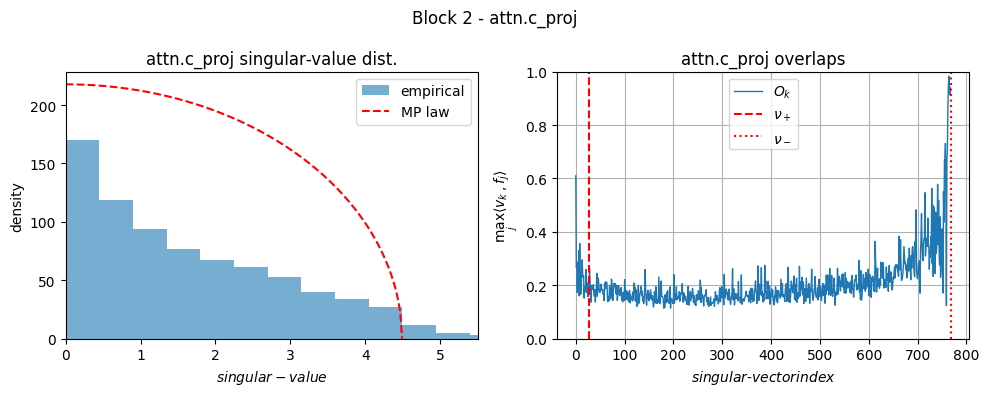

------------------------------

mlp.c_fc shape: (768, 3072)
buffer shape: (100, 600, 3072)
cov mat shape: (3072, 3072)     eig vecs shape: (3072, 3072)
max rank: 768
svals shape: (768,)     rvecs shape: (3072, 768)
# overlaps: (768,)
  mlp.c_fc: 5.60% above ν+ = 11.10,	10.16% below ν− = 3.70


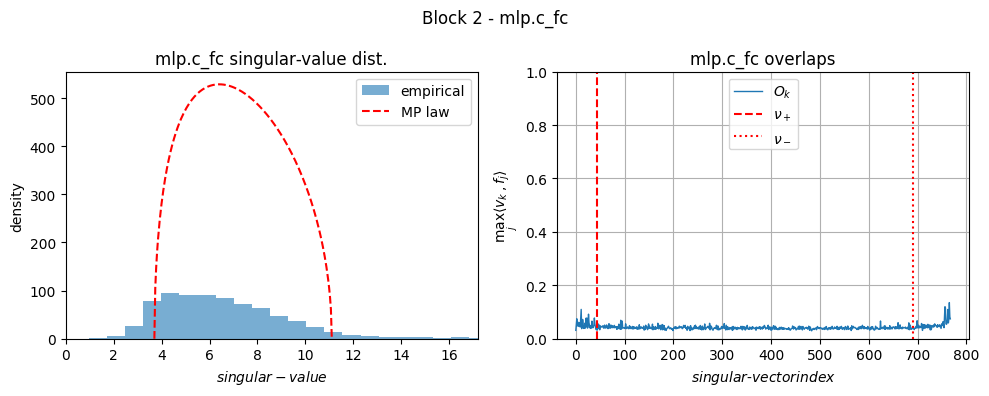

------------------------------

mlp.c_proj shape: (3072, 768)
buffer shape: (100, 600, 768)
cov mat shape: (768, 768)     eig vecs shape: (768, 768)
max rank: 768
svals shape: (768,)     rvecs shape: (768, 768)
# overlaps: (768,)
  mlp.c_proj: 5.99% above ν+ = 7.74,	10.81% below ν− = 2.58


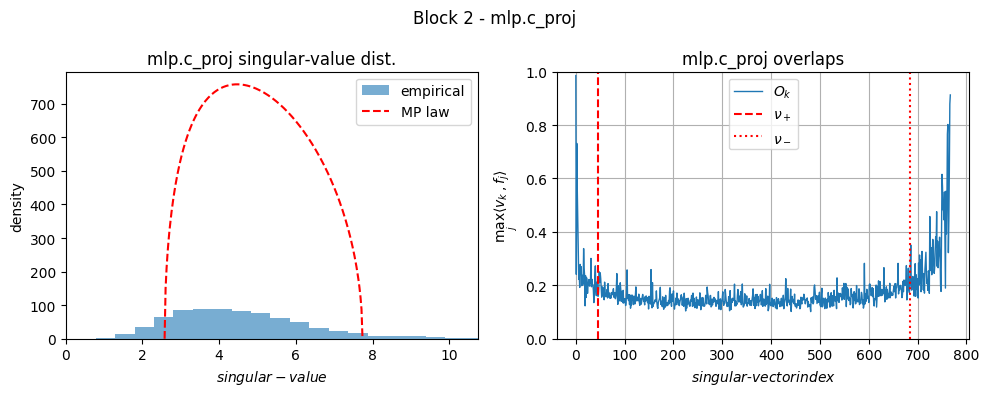

#####

BLOCK 3

#####

------------------------------

attn.c_attn.q shape: (768, 768)
buffer shape: (100, 600, 768)
cov mat shape: (768, 768)     eig vecs shape: (768, 768)
max rank: 768
svals shape: (768,)     rvecs shape: (768, 768)
# overlaps: (768,)
  attn.c_attn.q: 4.17% above ν+ = 9.13,	0.00% below ν− = 0.00


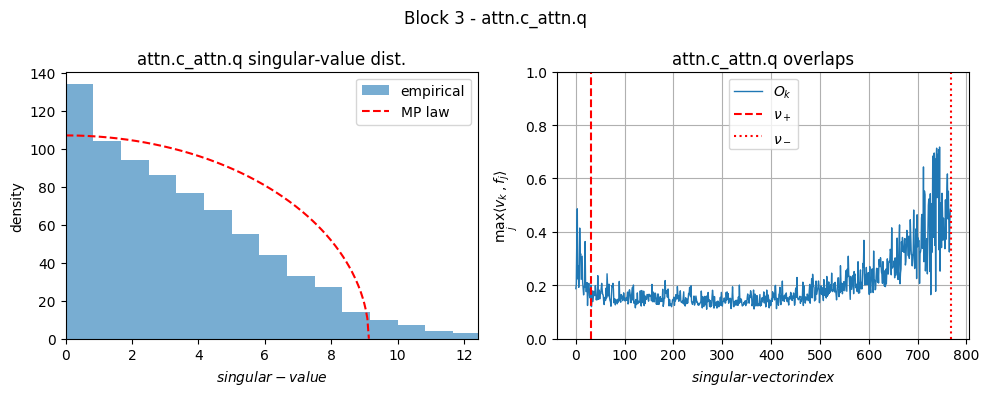

------------------------------

attn.c_attn.k shape: (768, 768)
buffer shape: (100, 600, 768)
cov mat shape: (768, 768)     eig vecs shape: (768, 768)
max rank: 768
svals shape: (768,)     rvecs shape: (768, 768)
# overlaps: (768,)
  attn.c_attn.k: 3.26% above ν+ = 8.52,	0.00% below ν− = 0.00


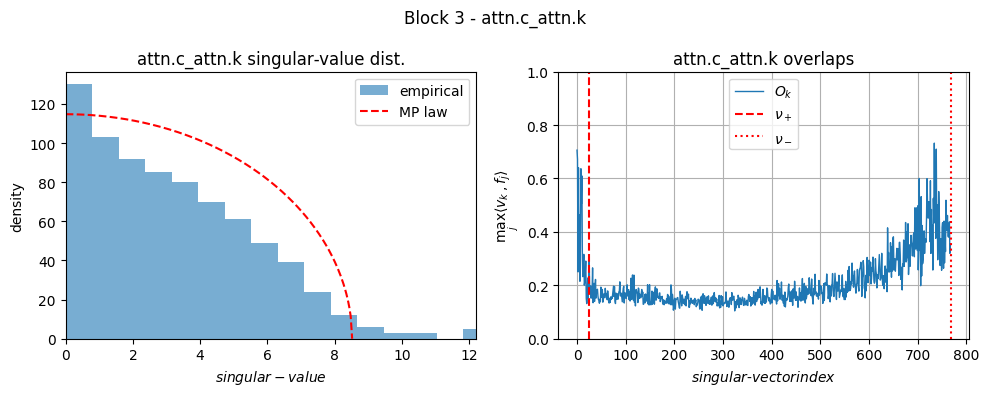

------------------------------

attn.c_attn.v shape: (768, 768)
buffer shape: (100, 600, 768)
cov mat shape: (768, 768)     eig vecs shape: (768, 768)
max rank: 768
svals shape: (768,)     rvecs shape: (768, 768)
# overlaps: (768,)
  attn.c_attn.v: 5.60% above ν+ = 5.41,	0.00% below ν− = 0.00


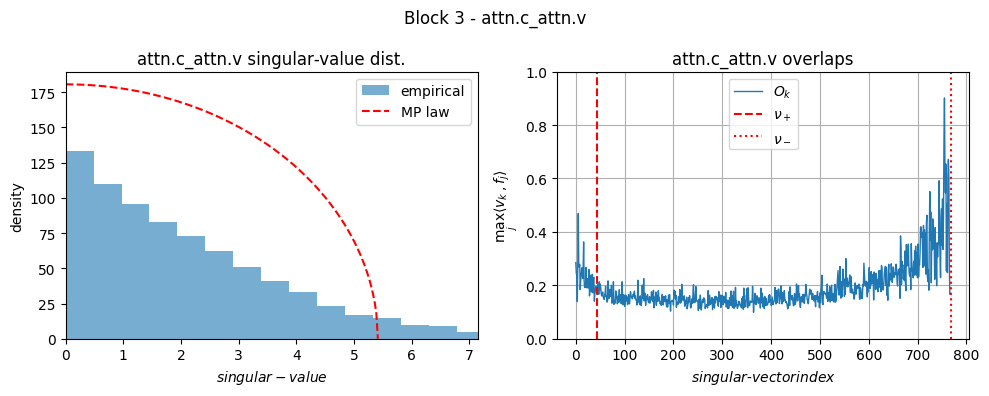

------------------------------

attn.c_proj shape: (768, 768)
buffer shape: (100, 600, 768)
cov mat shape: (768, 768)     eig vecs shape: (768, 768)
max rank: 768
svals shape: (768,)     rvecs shape: (768, 768)
# overlaps: (768,)
  attn.c_proj: 4.56% above ν+ = 4.66,	0.00% below ν− = 0.00


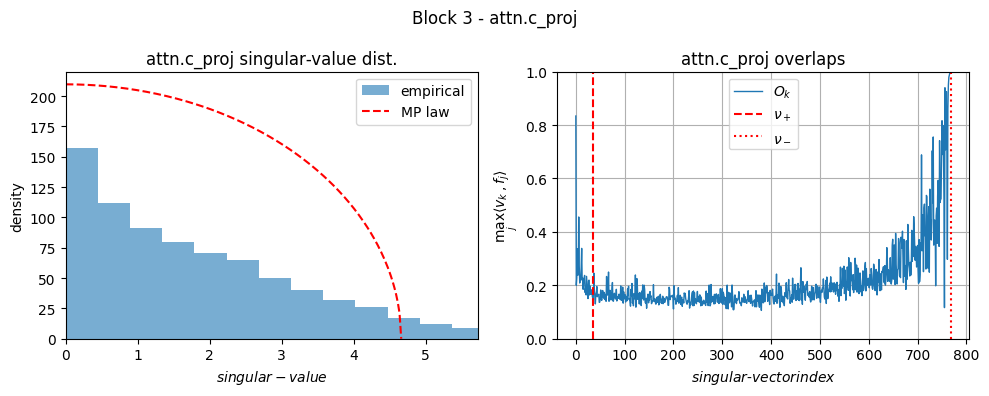

------------------------------

mlp.c_fc shape: (768, 3072)
buffer shape: (100, 600, 3072)
cov mat shape: (3072, 3072)     eig vecs shape: (3072, 3072)
max rank: 768
svals shape: (768,)     rvecs shape: (3072, 768)
# overlaps: (768,)
  mlp.c_fc: 7.16% above ν+ = 10.77,	11.85% below ν− = 3.59


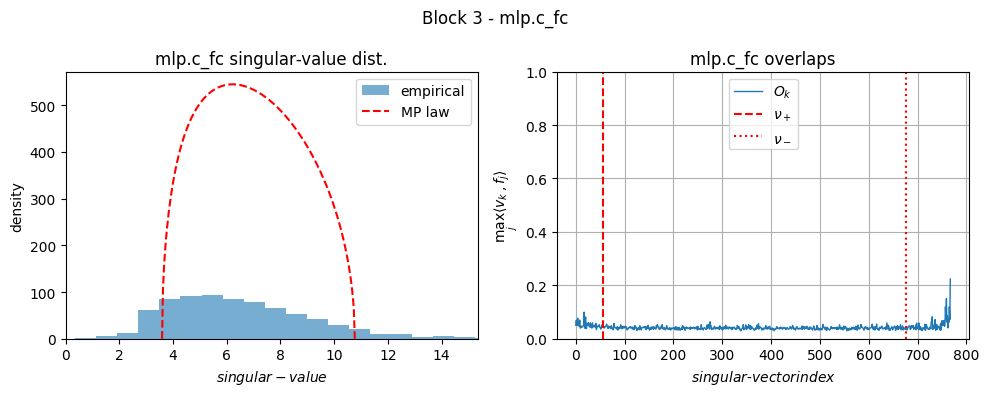

------------------------------

mlp.c_proj shape: (3072, 768)
buffer shape: (100, 600, 768)
cov mat shape: (768, 768)     eig vecs shape: (768, 768)
max rank: 768
svals shape: (768,)     rvecs shape: (768, 768)
# overlaps: (768,)
  mlp.c_proj: 6.90% above ν+ = 7.63,	13.02% below ν− = 2.54


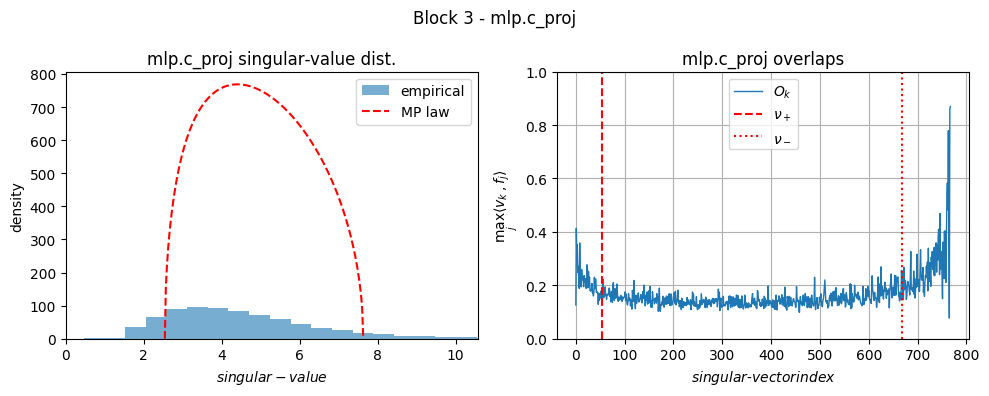

#####

BLOCK 4

#####

------------------------------

attn.c_attn.q shape: (768, 768)
buffer shape: (100, 600, 768)
cov mat shape: (768, 768)     eig vecs shape: (768, 768)
max rank: 768
svals shape: (768,)     rvecs shape: (768, 768)
# overlaps: (768,)
  attn.c_attn.q: 5.60% above ν+ = 9.45,	0.00% below ν− = 0.00


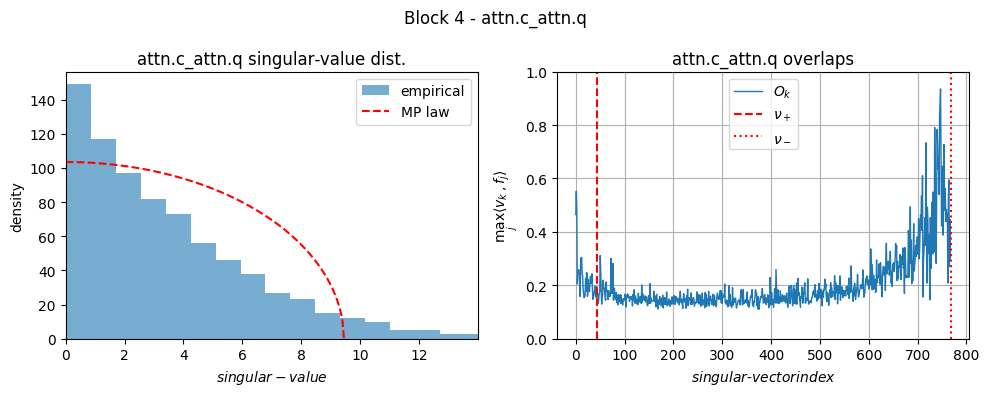

------------------------------

attn.c_attn.k shape: (768, 768)
buffer shape: (100, 600, 768)
cov mat shape: (768, 768)     eig vecs shape: (768, 768)
max rank: 768
svals shape: (768,)     rvecs shape: (768, 768)
# overlaps: (768,)
  attn.c_attn.k: 4.17% above ν+ = 8.73,	0.00% below ν− = 0.00


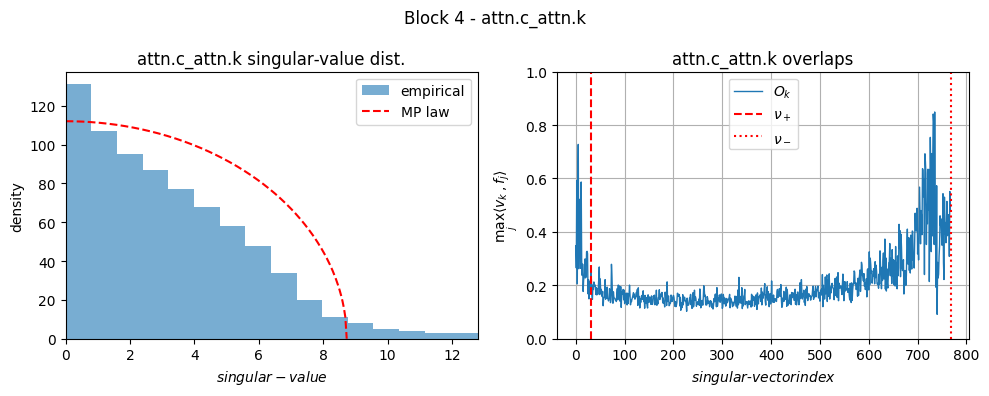

------------------------------

attn.c_attn.v shape: (768, 768)
buffer shape: (100, 600, 768)
cov mat shape: (768, 768)     eig vecs shape: (768, 768)
max rank: 768
svals shape: (768,)     rvecs shape: (768, 768)
# overlaps: (768,)
  attn.c_attn.v: 4.95% above ν+ = 5.67,	0.00% below ν− = 0.00


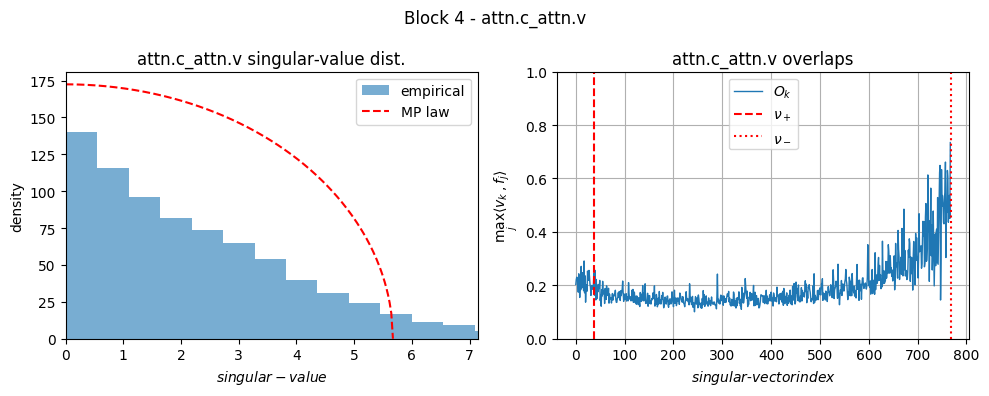

------------------------------

attn.c_proj shape: (768, 768)
buffer shape: (100, 600, 768)
cov mat shape: (768, 768)     eig vecs shape: (768, 768)
max rank: 768
svals shape: (768,)     rvecs shape: (768, 768)
# overlaps: (768,)
  attn.c_proj: 4.82% above ν+ = 5.15,	0.00% below ν− = 0.00


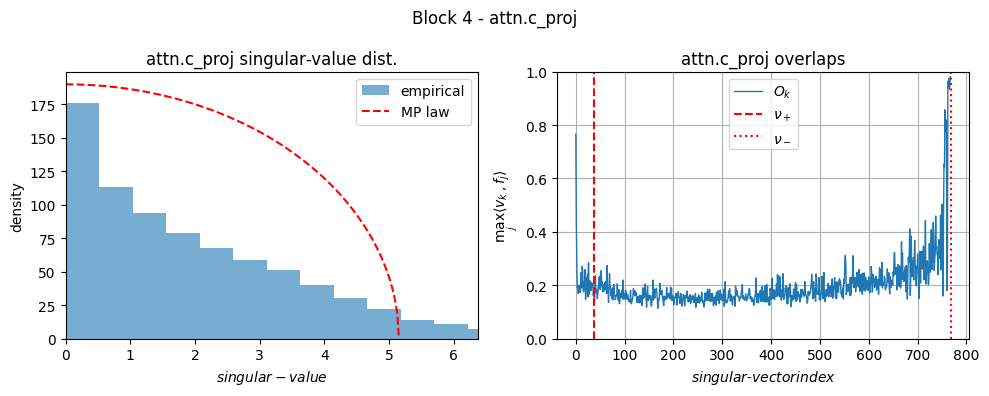

------------------------------

mlp.c_fc shape: (768, 3072)
buffer shape: (100, 600, 3072)
cov mat shape: (3072, 3072)     eig vecs shape: (3072, 3072)
max rank: 768
svals shape: (768,)     rvecs shape: (3072, 768)
# overlaps: (768,)
  mlp.c_fc: 8.07% above ν+ = 10.78,	13.15% below ν− = 3.59


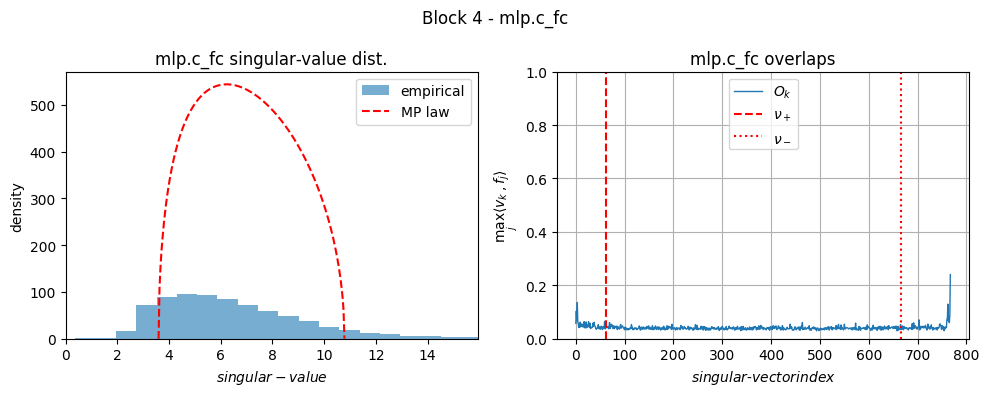

------------------------------

mlp.c_proj shape: (3072, 768)
buffer shape: (100, 600, 768)
cov mat shape: (768, 768)     eig vecs shape: (768, 768)
max rank: 768
svals shape: (768,)     rvecs shape: (768, 768)
# overlaps: (768,)
  mlp.c_proj: 7.42% above ν+ = 7.57,	11.72% below ν− = 2.52


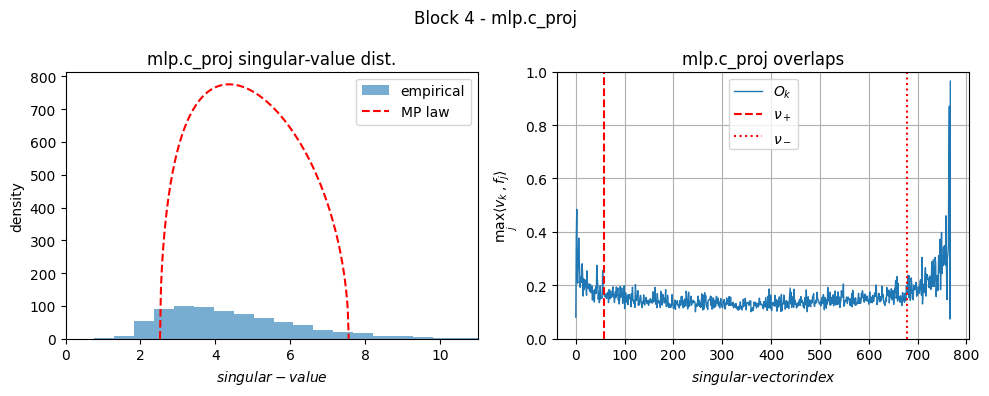

#####

BLOCK 5

#####

------------------------------

attn.c_attn.q shape: (768, 768)
buffer shape: (100, 600, 768)
cov mat shape: (768, 768)     eig vecs shape: (768, 768)
max rank: 768
svals shape: (768,)     rvecs shape: (768, 768)
# overlaps: (768,)
  attn.c_attn.q: 7.03% above ν+ = 7.83,	0.00% below ν− = 0.00


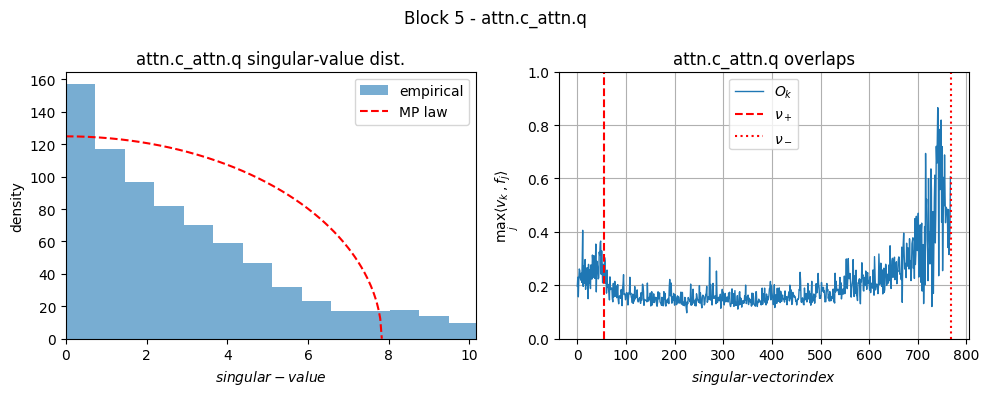

------------------------------

attn.c_attn.k shape: (768, 768)
buffer shape: (100, 600, 768)
cov mat shape: (768, 768)     eig vecs shape: (768, 768)
max rank: 768
svals shape: (768,)     rvecs shape: (768, 768)
# overlaps: (768,)
  attn.c_attn.k: 7.16% above ν+ = 7.55,	0.00% below ν− = 0.00


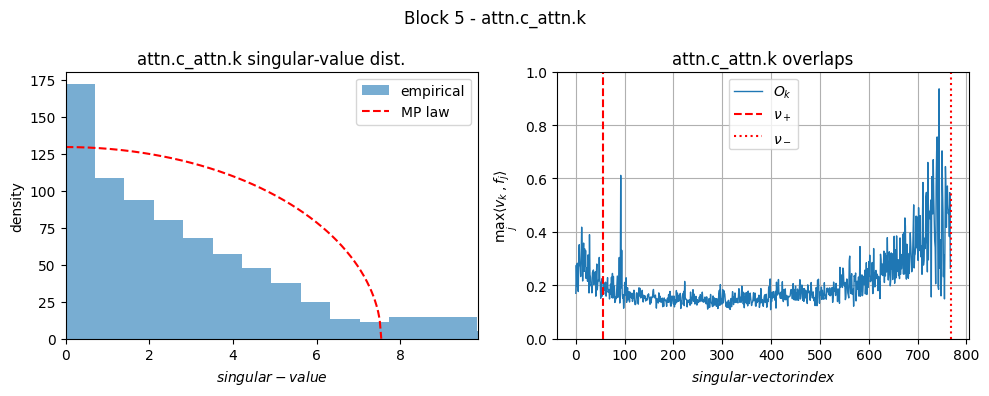

------------------------------

attn.c_attn.v shape: (768, 768)
buffer shape: (100, 600, 768)
cov mat shape: (768, 768)     eig vecs shape: (768, 768)
max rank: 768
svals shape: (768,)     rvecs shape: (768, 768)
# overlaps: (768,)
  attn.c_attn.v: 5.34% above ν+ = 5.73,	0.00% below ν− = 0.00


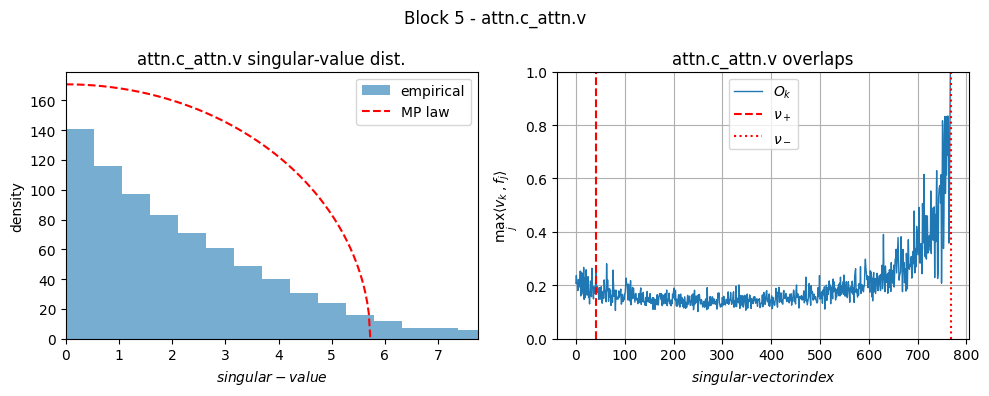

------------------------------

attn.c_proj shape: (768, 768)
buffer shape: (100, 600, 768)
cov mat shape: (768, 768)     eig vecs shape: (768, 768)
max rank: 768
svals shape: (768,)     rvecs shape: (768, 768)
# overlaps: (768,)
  attn.c_proj: 4.04% above ν+ = 5.20,	0.00% below ν− = 0.00


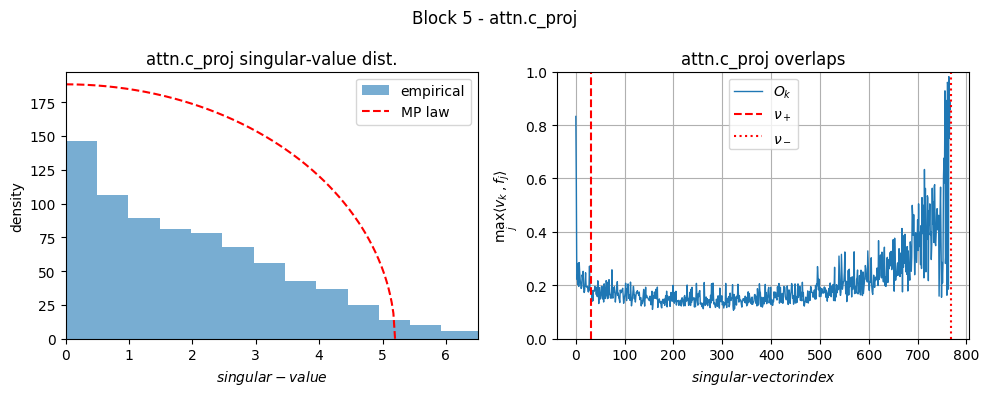

------------------------------

mlp.c_fc shape: (768, 3072)
buffer shape: (100, 600, 3072)
cov mat shape: (3072, 3072)     eig vecs shape: (3072, 3072)
max rank: 768
svals shape: (768,)     rvecs shape: (3072, 768)
# overlaps: (768,)
  mlp.c_fc: 7.94% above ν+ = 10.53,	13.02% below ν− = 3.51


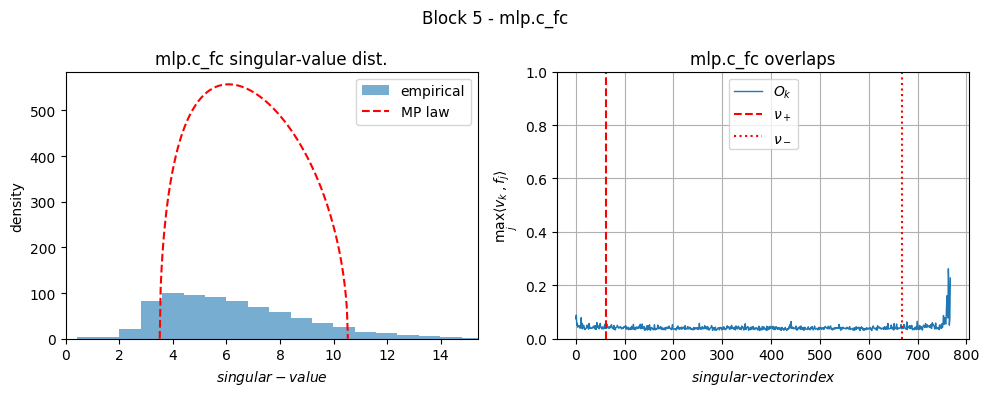

------------------------------

mlp.c_proj shape: (3072, 768)
buffer shape: (100, 600, 768)
cov mat shape: (768, 768)     eig vecs shape: (768, 768)
max rank: 768
svals shape: (768,)     rvecs shape: (768, 768)
# overlaps: (768,)
  mlp.c_proj: 7.55% above ν+ = 8.09,	11.20% below ν− = 2.70


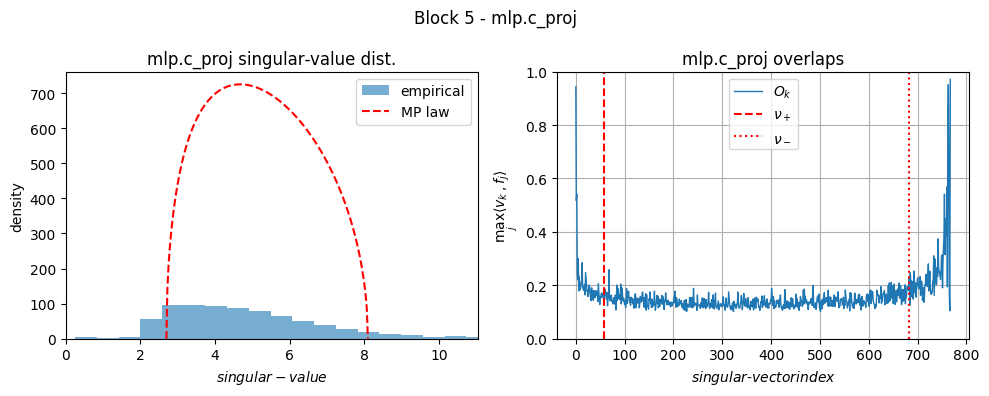

#####

BLOCK 6

#####

------------------------------

attn.c_attn.q shape: (768, 768)
buffer shape: (100, 600, 768)
cov mat shape: (768, 768)     eig vecs shape: (768, 768)
max rank: 768
svals shape: (768,)     rvecs shape: (768, 768)
# overlaps: (768,)
  attn.c_attn.q: 5.34% above ν+ = 7.43,	0.00% below ν− = 0.00


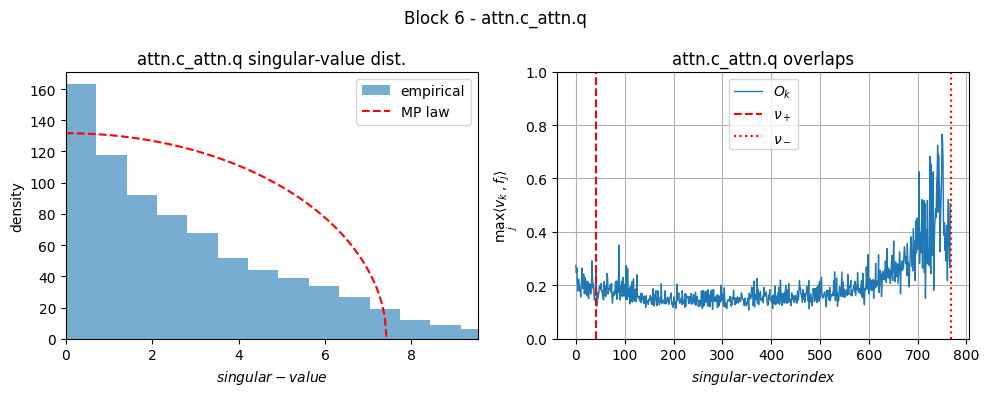

------------------------------

attn.c_attn.k shape: (768, 768)
buffer shape: (100, 600, 768)
cov mat shape: (768, 768)     eig vecs shape: (768, 768)
max rank: 768
svals shape: (768,)     rvecs shape: (768, 768)
# overlaps: (768,)
  attn.c_attn.k: 3.78% above ν+ = 7.07,	0.00% below ν− = 0.00


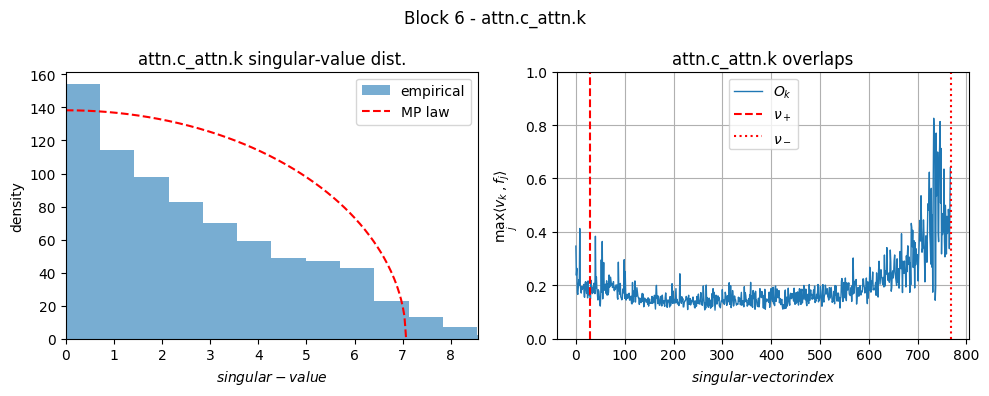

------------------------------

attn.c_attn.v shape: (768, 768)
buffer shape: (100, 600, 768)
cov mat shape: (768, 768)     eig vecs shape: (768, 768)
max rank: 768
svals shape: (768,)     rvecs shape: (768, 768)
# overlaps: (768,)
  attn.c_attn.v: 5.73% above ν+ = 6.57,	0.00% below ν− = 0.00


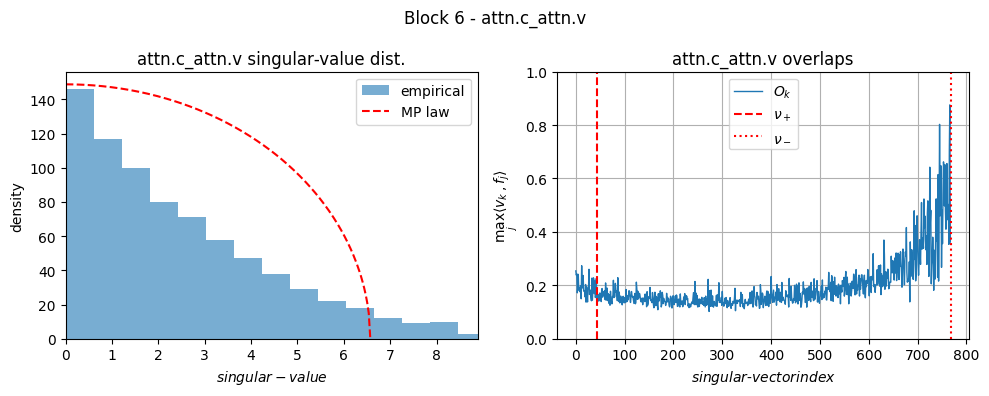

------------------------------

attn.c_proj shape: (768, 768)
buffer shape: (100, 600, 768)
cov mat shape: (768, 768)     eig vecs shape: (768, 768)
max rank: 768
svals shape: (768,)     rvecs shape: (768, 768)
# overlaps: (768,)
  attn.c_proj: 5.47% above ν+ = 6.30,	0.00% below ν− = 0.00


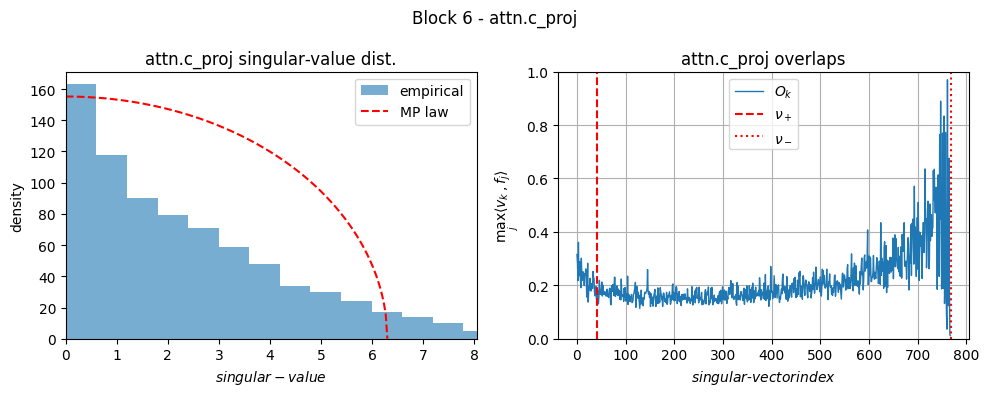

------------------------------

mlp.c_fc shape: (768, 3072)
buffer shape: (100, 600, 3072)
cov mat shape: (3072, 3072)     eig vecs shape: (3072, 3072)
max rank: 768
svals shape: (768,)     rvecs shape: (3072, 768)
# overlaps: (768,)
  mlp.c_fc: 8.07% above ν+ = 10.51,	12.37% below ν− = 3.50


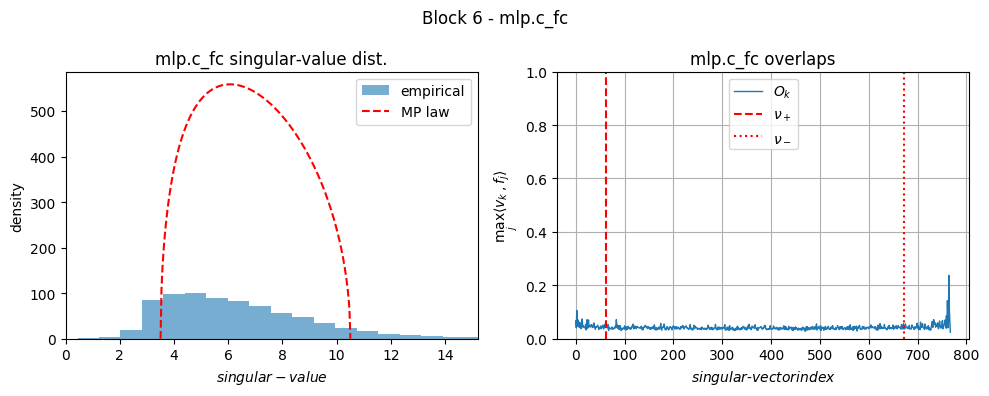

------------------------------

mlp.c_proj shape: (3072, 768)
buffer shape: (100, 600, 768)
cov mat shape: (768, 768)     eig vecs shape: (768, 768)
max rank: 768
svals shape: (768,)     rvecs shape: (768, 768)
# overlaps: (768,)
  mlp.c_proj: 7.29% above ν+ = 8.92,	10.68% below ν− = 2.97


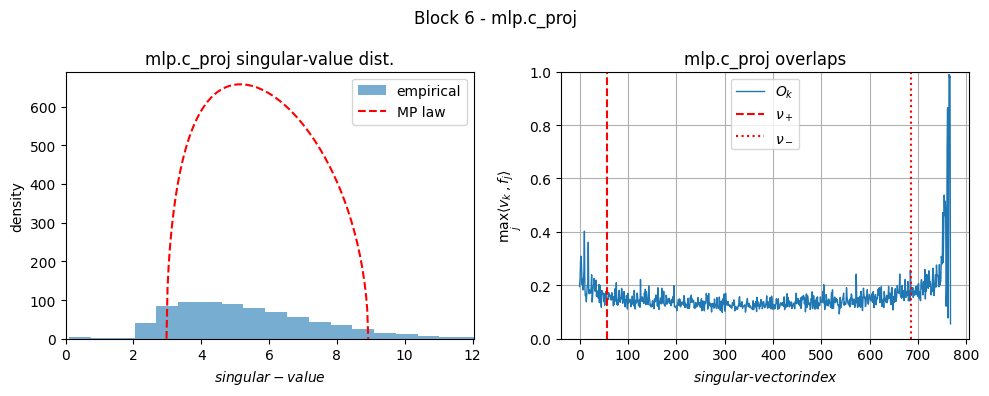

#####

BLOCK 7

#####

------------------------------

attn.c_attn.q shape: (768, 768)
buffer shape: (100, 600, 768)
cov mat shape: (768, 768)     eig vecs shape: (768, 768)
max rank: 768
svals shape: (768,)     rvecs shape: (768, 768)
# overlaps: (768,)
  attn.c_attn.q: 6.51% above ν+ = 7.56,	0.00% below ν− = 0.00


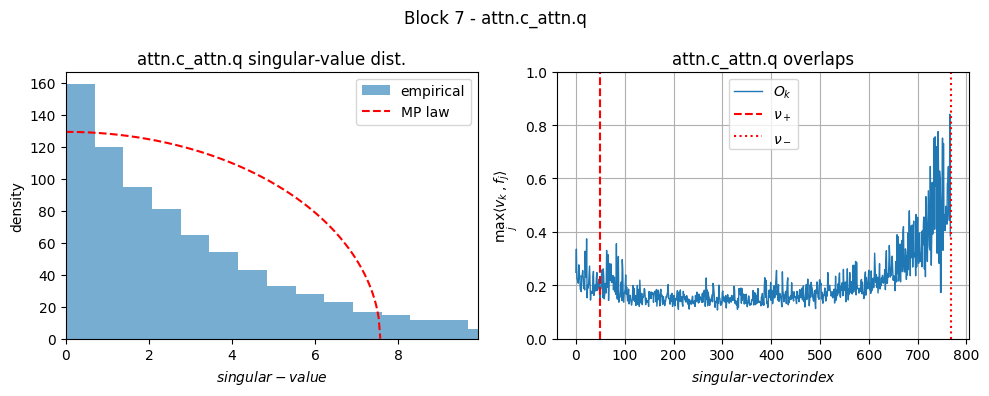

------------------------------

attn.c_attn.k shape: (768, 768)
buffer shape: (100, 600, 768)
cov mat shape: (768, 768)     eig vecs shape: (768, 768)
max rank: 768
svals shape: (768,)     rvecs shape: (768, 768)
# overlaps: (768,)
  attn.c_attn.k: 6.51% above ν+ = 7.23,	0.00% below ν− = 0.00


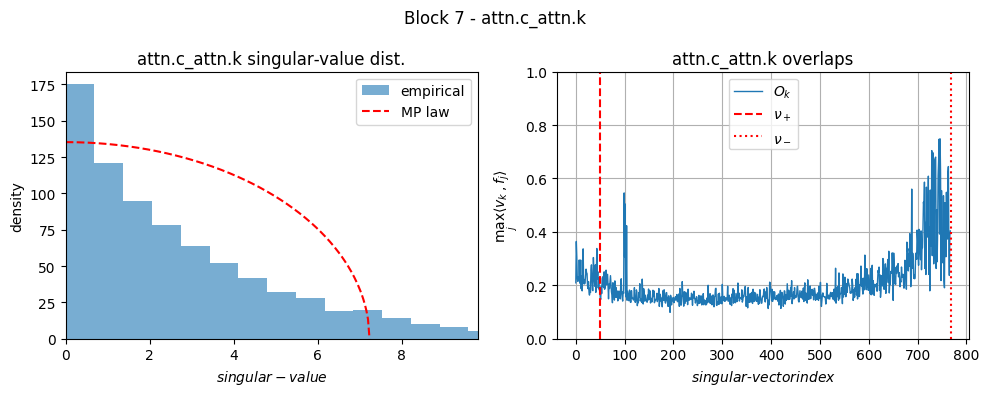

------------------------------

attn.c_attn.v shape: (768, 768)
buffer shape: (100, 600, 768)
cov mat shape: (768, 768)     eig vecs shape: (768, 768)
max rank: 768
svals shape: (768,)     rvecs shape: (768, 768)
# overlaps: (768,)
  attn.c_attn.v: 4.30% above ν+ = 6.62,	0.00% below ν− = 0.00


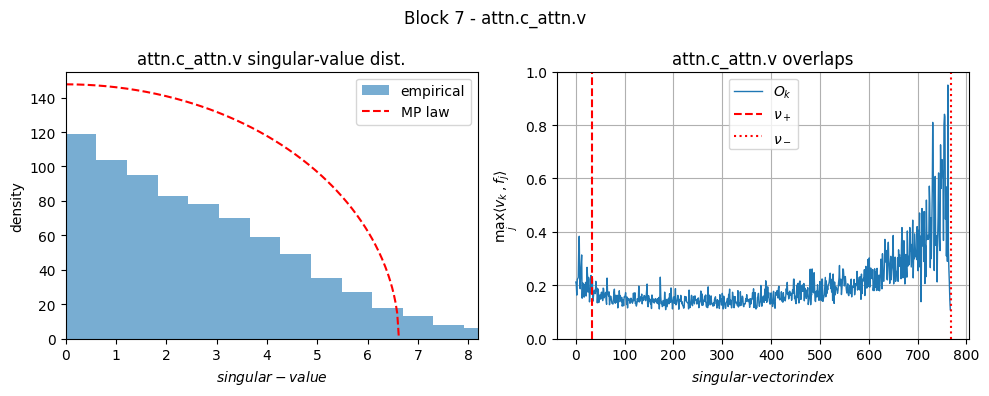

------------------------------

attn.c_proj shape: (768, 768)
buffer shape: (100, 600, 768)
cov mat shape: (768, 768)     eig vecs shape: (768, 768)
max rank: 768
svals shape: (768,)     rvecs shape: (768, 768)
# overlaps: (768,)
  attn.c_proj: 4.82% above ν+ = 6.31,	0.00% below ν− = 0.00


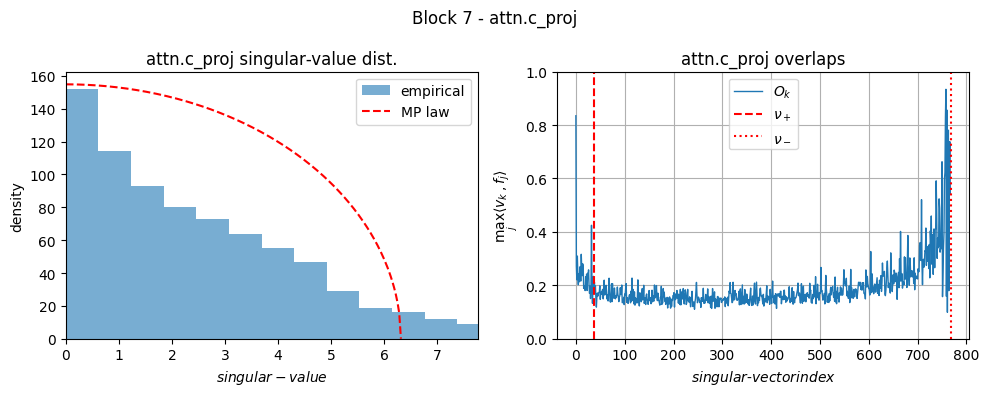

------------------------------

mlp.c_fc shape: (768, 3072)
buffer shape: (100, 600, 3072)
cov mat shape: (3072, 3072)     eig vecs shape: (3072, 3072)
max rank: 768
svals shape: (768,)     rvecs shape: (3072, 768)
# overlaps: (768,)
  mlp.c_fc: 7.94% above ν+ = 10.51,	12.11% below ν− = 3.50


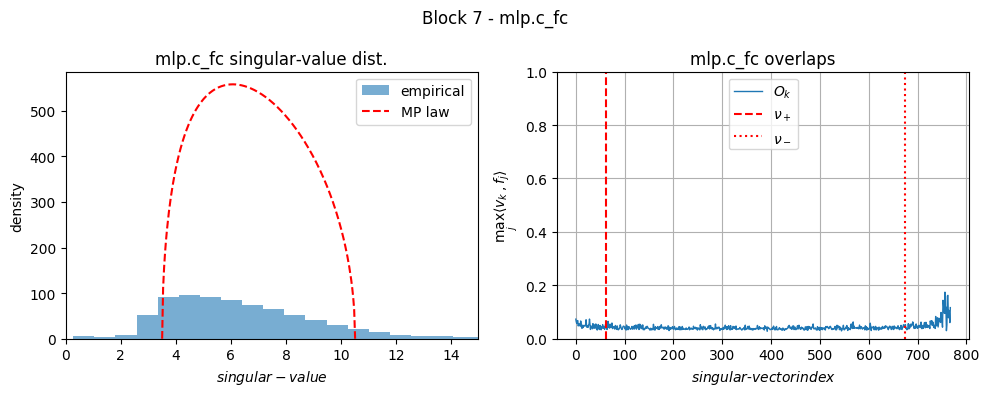

------------------------------

mlp.c_proj shape: (3072, 768)
buffer shape: (100, 600, 768)
cov mat shape: (768, 768)     eig vecs shape: (768, 768)
max rank: 768
svals shape: (768,)     rvecs shape: (768, 768)
# overlaps: (768,)
  mlp.c_proj: 7.03% above ν+ = 9.87,	9.90% below ν− = 3.29


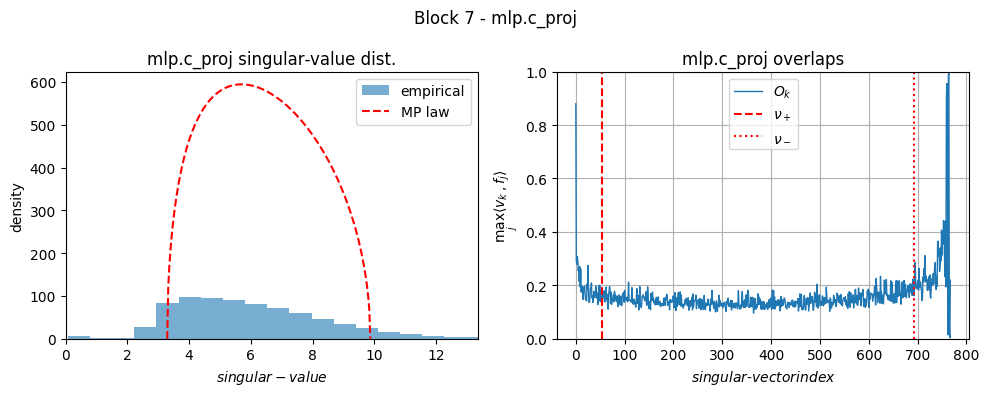

#####

BLOCK 8

#####

------------------------------

attn.c_attn.q shape: (768, 768)
buffer shape: (100, 600, 768)
cov mat shape: (768, 768)     eig vecs shape: (768, 768)
max rank: 768
svals shape: (768,)     rvecs shape: (768, 768)
# overlaps: (768,)
  attn.c_attn.q: 5.47% above ν+ = 7.21,	0.00% below ν− = 0.00


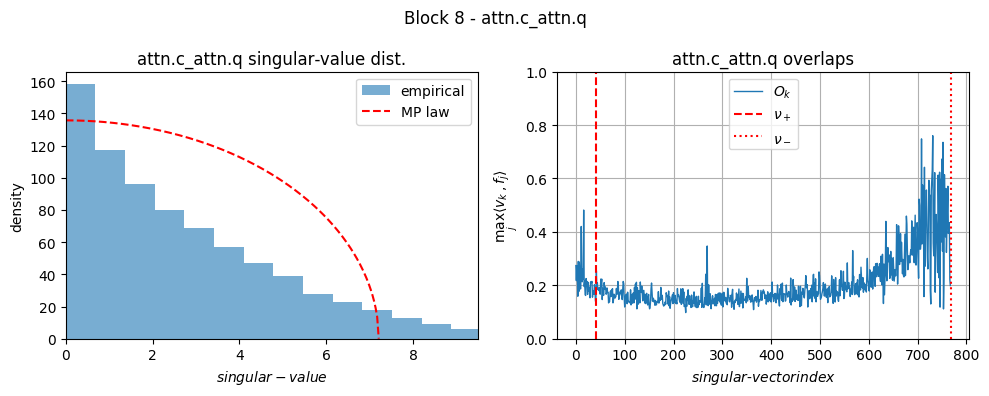

------------------------------

attn.c_attn.k shape: (768, 768)
buffer shape: (100, 600, 768)
cov mat shape: (768, 768)     eig vecs shape: (768, 768)
max rank: 768
svals shape: (768,)     rvecs shape: (768, 768)
# overlaps: (768,)
  attn.c_attn.k: 4.43% above ν+ = 6.89,	0.00% below ν− = 0.00


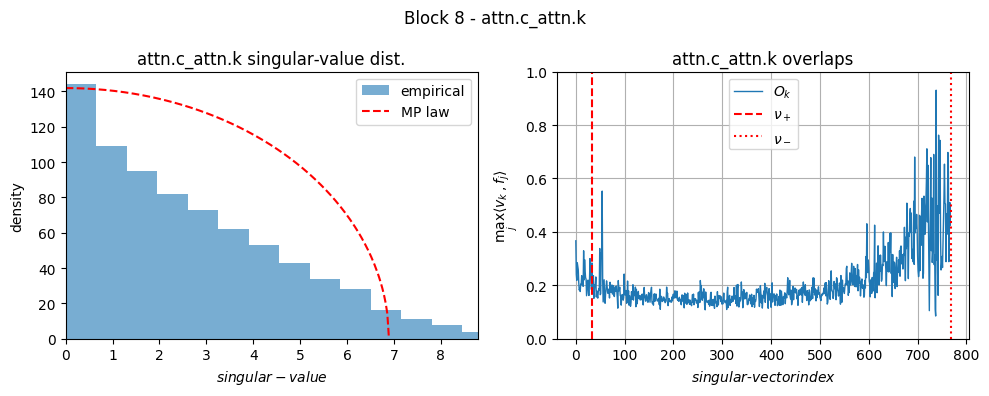

------------------------------

attn.c_attn.v shape: (768, 768)
buffer shape: (100, 600, 768)
cov mat shape: (768, 768)     eig vecs shape: (768, 768)
max rank: 768
svals shape: (768,)     rvecs shape: (768, 768)
# overlaps: (768,)
  attn.c_attn.v: 3.52% above ν+ = 7.00,	0.00% below ν− = 0.00


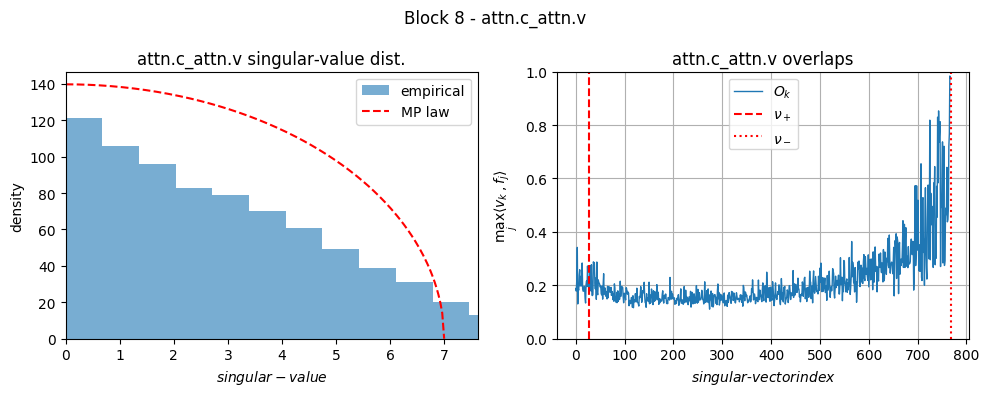

------------------------------

attn.c_proj shape: (768, 768)
buffer shape: (100, 600, 768)
cov mat shape: (768, 768)     eig vecs shape: (768, 768)
max rank: 768
svals shape: (768,)     rvecs shape: (768, 768)
# overlaps: (768,)
  attn.c_proj: 4.82% above ν+ = 6.78,	0.00% below ν− = 0.00


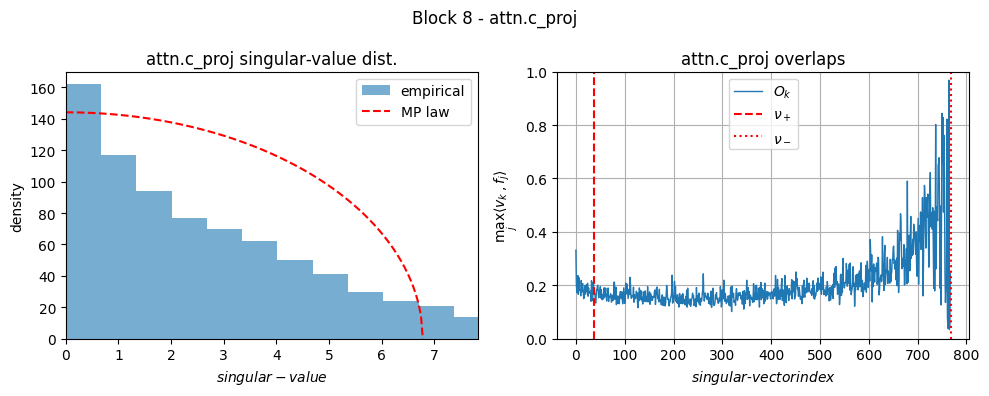

------------------------------

mlp.c_fc shape: (768, 3072)
buffer shape: (100, 600, 3072)
cov mat shape: (3072, 3072)     eig vecs shape: (3072, 3072)
max rank: 768
svals shape: (768,)     rvecs shape: (3072, 768)
# overlaps: (768,)
  mlp.c_fc: 7.68% above ν+ = 10.58,	11.07% below ν− = 3.53


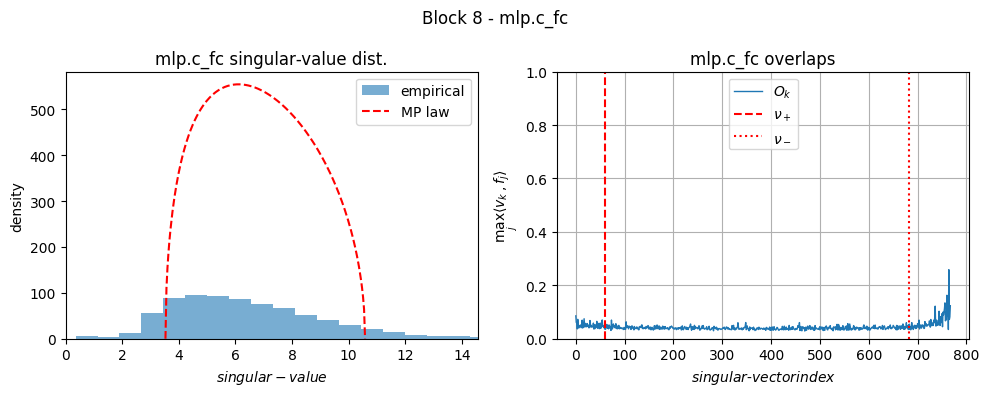

------------------------------

mlp.c_proj shape: (3072, 768)
buffer shape: (100, 600, 768)
cov mat shape: (768, 768)     eig vecs shape: (768, 768)
max rank: 768
svals shape: (768,)     rvecs shape: (768, 768)
# overlaps: (768,)
  mlp.c_proj: 7.42% above ν+ = 11.26,	11.46% below ν− = 3.75


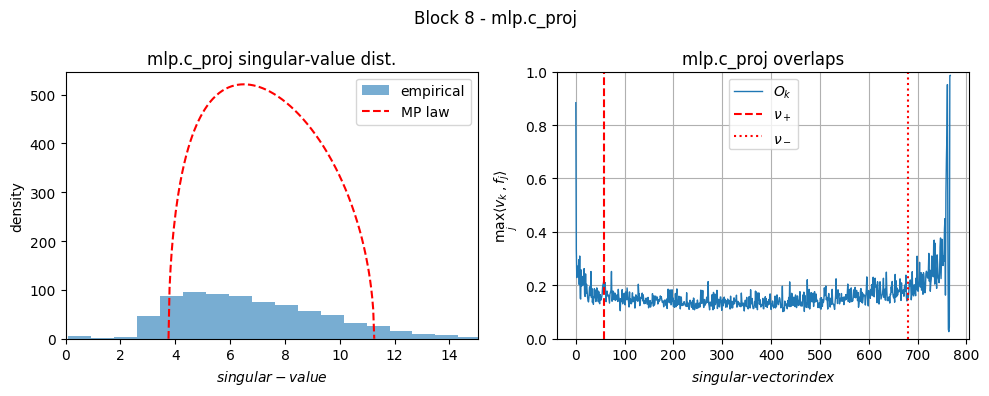

#####

BLOCK 9

#####

------------------------------

attn.c_attn.q shape: (768, 768)
buffer shape: (100, 600, 768)
cov mat shape: (768, 768)     eig vecs shape: (768, 768)
max rank: 768
svals shape: (768,)     rvecs shape: (768, 768)
# overlaps: (768,)
  attn.c_attn.q: 5.47% above ν+ = 6.82,	0.00% below ν− = 0.00


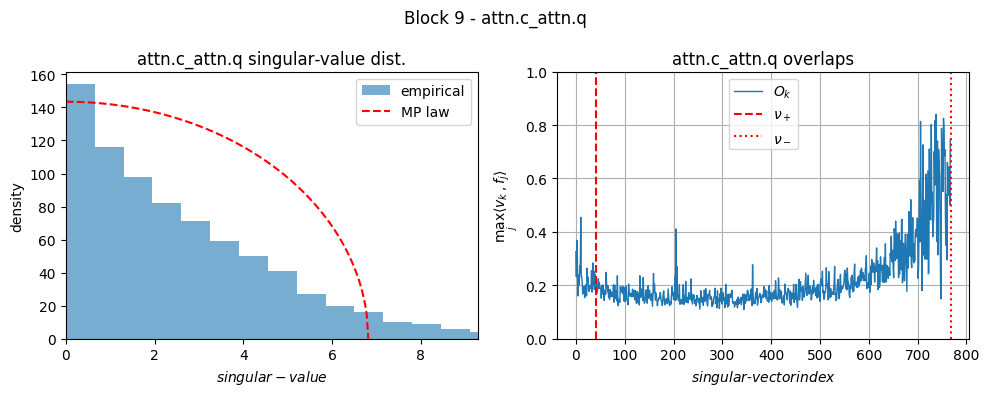

------------------------------

attn.c_attn.k shape: (768, 768)
buffer shape: (100, 600, 768)
cov mat shape: (768, 768)     eig vecs shape: (768, 768)
max rank: 768
svals shape: (768,)     rvecs shape: (768, 768)
# overlaps: (768,)
  attn.c_attn.k: 5.21% above ν+ = 6.59,	0.00% below ν− = 0.00


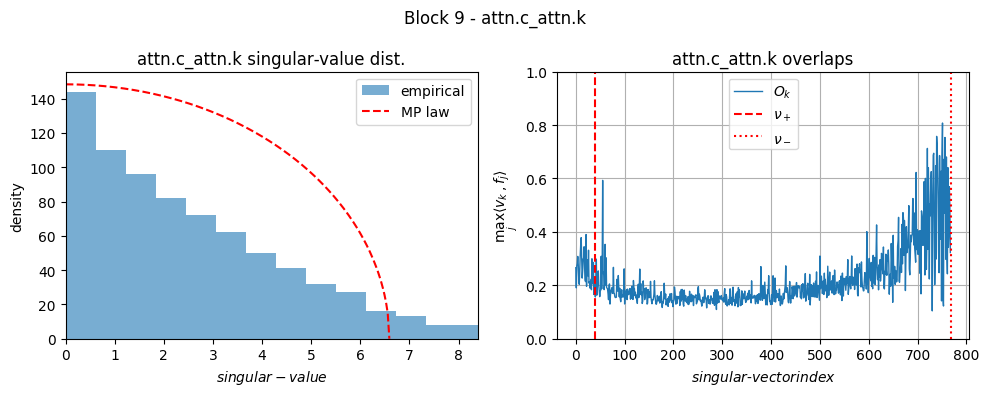

------------------------------

attn.c_attn.v shape: (768, 768)
buffer shape: (100, 600, 768)
cov mat shape: (768, 768)     eig vecs shape: (768, 768)
max rank: 768
svals shape: (768,)     rvecs shape: (768, 768)
# overlaps: (768,)
  attn.c_attn.v: 2.34% above ν+ = 7.54,	0.00% below ν− = 0.00


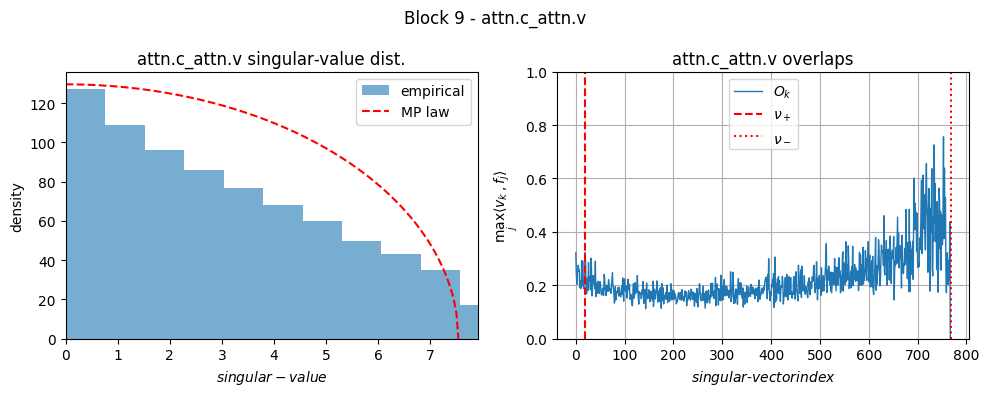

------------------------------

attn.c_proj shape: (768, 768)
buffer shape: (100, 600, 768)
cov mat shape: (768, 768)     eig vecs shape: (768, 768)
max rank: 768
svals shape: (768,)     rvecs shape: (768, 768)
# overlaps: (768,)
  attn.c_proj: 0.91% above ν+ = 7.58,	0.00% below ν− = 0.00


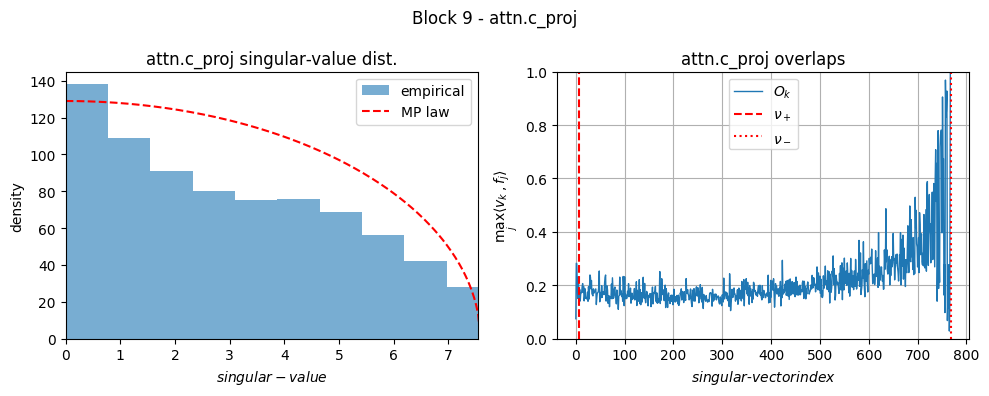

------------------------------

mlp.c_fc shape: (768, 3072)
buffer shape: (100, 600, 3072)
cov mat shape: (3072, 3072)     eig vecs shape: (3072, 3072)
max rank: 768
svals shape: (768,)     rvecs shape: (3072, 768)
# overlaps: (768,)
  mlp.c_fc: 7.55% above ν+ = 10.61,	11.85% below ν− = 3.54


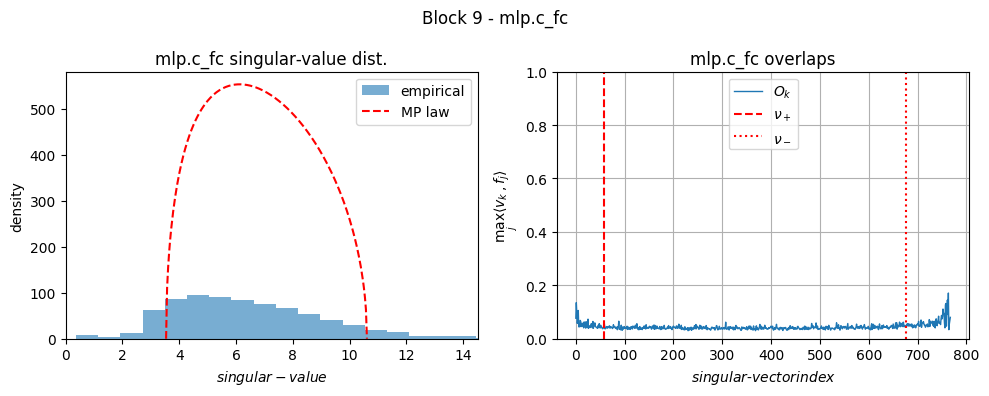

------------------------------

mlp.c_proj shape: (3072, 768)
buffer shape: (100, 600, 768)
cov mat shape: (768, 768)     eig vecs shape: (768, 768)
max rank: 768
svals shape: (768,)     rvecs shape: (768, 768)
# overlaps: (768,)
  mlp.c_proj: 7.68% above ν+ = 12.96,	11.20% below ν− = 4.32


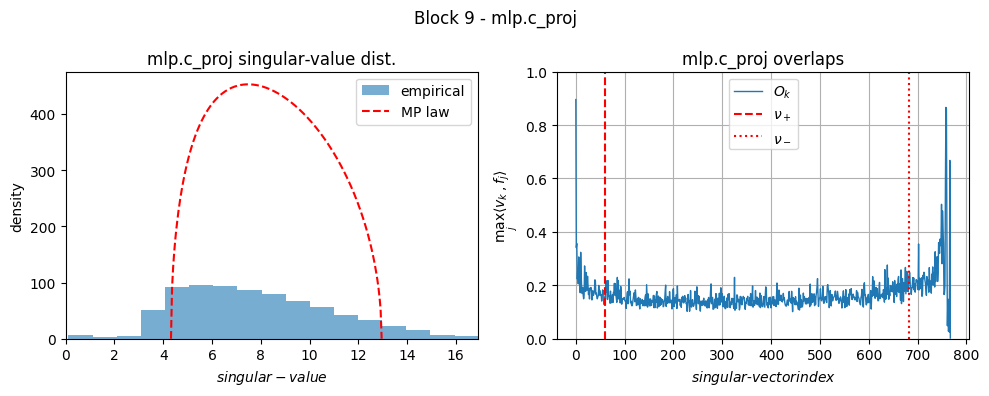

#####

BLOCK 10

#####

------------------------------

attn.c_attn.q shape: (768, 768)
buffer shape: (100, 600, 768)
cov mat shape: (768, 768)     eig vecs shape: (768, 768)
max rank: 768
svals shape: (768,)     rvecs shape: (768, 768)
# overlaps: (768,)
  attn.c_attn.q: 5.73% above ν+ = 6.58,	0.00% below ν− = 0.00


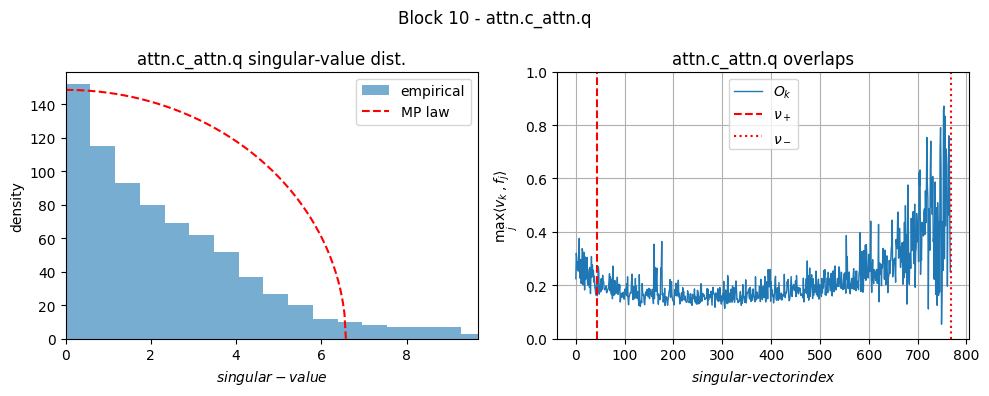

------------------------------

attn.c_attn.k shape: (768, 768)
buffer shape: (100, 600, 768)
cov mat shape: (768, 768)     eig vecs shape: (768, 768)
max rank: 768
svals shape: (768,)     rvecs shape: (768, 768)
# overlaps: (768,)
  attn.c_attn.k: 5.86% above ν+ = 6.36,	0.00% below ν− = 0.00


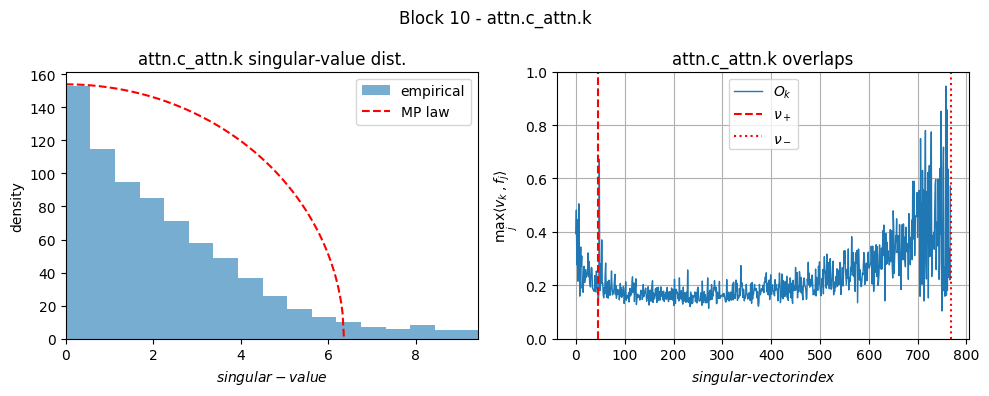

------------------------------

attn.c_attn.v shape: (768, 768)
buffer shape: (100, 600, 768)
cov mat shape: (768, 768)     eig vecs shape: (768, 768)
max rank: 768
svals shape: (768,)     rvecs shape: (768, 768)
# overlaps: (768,)
  attn.c_attn.v: 5.21% above ν+ = 8.01,	0.00% below ν− = 0.00


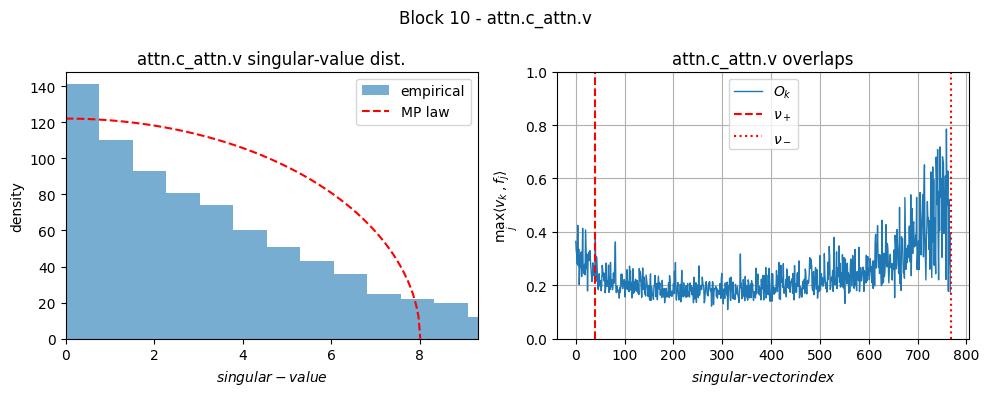

------------------------------

attn.c_proj shape: (768, 768)
buffer shape: (100, 600, 768)
cov mat shape: (768, 768)     eig vecs shape: (768, 768)
max rank: 768
svals shape: (768,)     rvecs shape: (768, 768)
# overlaps: (768,)
  attn.c_proj: 0.26% above ν+ = 8.13,	0.00% below ν− = 0.00


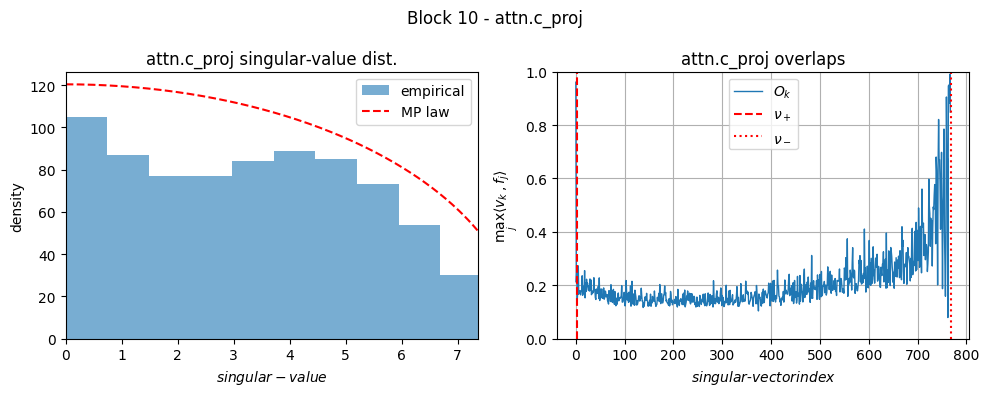

------------------------------

mlp.c_fc shape: (768, 3072)
buffer shape: (100, 600, 3072)
cov mat shape: (3072, 3072)     eig vecs shape: (3072, 3072)
max rank: 768
svals shape: (768,)     rvecs shape: (3072, 768)
# overlaps: (768,)
  mlp.c_fc: 7.55% above ν+ = 10.61,	11.72% below ν− = 3.54


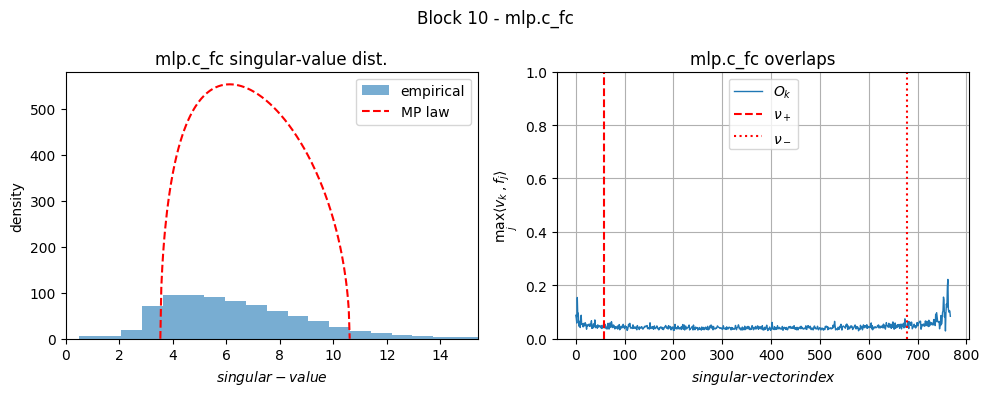

------------------------------

mlp.c_proj shape: (3072, 768)
buffer shape: (100, 600, 768)
cov mat shape: (768, 768)     eig vecs shape: (768, 768)
max rank: 768
svals shape: (768,)     rvecs shape: (768, 768)
# overlaps: (768,)
  mlp.c_proj: 6.38% above ν+ = 14.81,	9.51% below ν− = 4.94


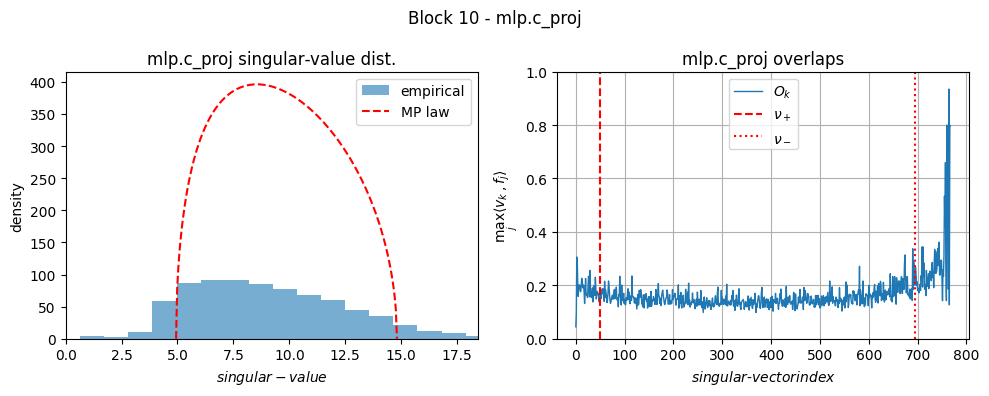

#####

BLOCK 11

#####

------------------------------

attn.c_attn.q shape: (768, 768)
buffer shape: (100, 600, 768)
cov mat shape: (768, 768)     eig vecs shape: (768, 768)
max rank: 768
svals shape: (768,)     rvecs shape: (768, 768)
# overlaps: (768,)
  attn.c_attn.q: 4.69% above ν+ = 6.09,	0.00% below ν− = 0.00


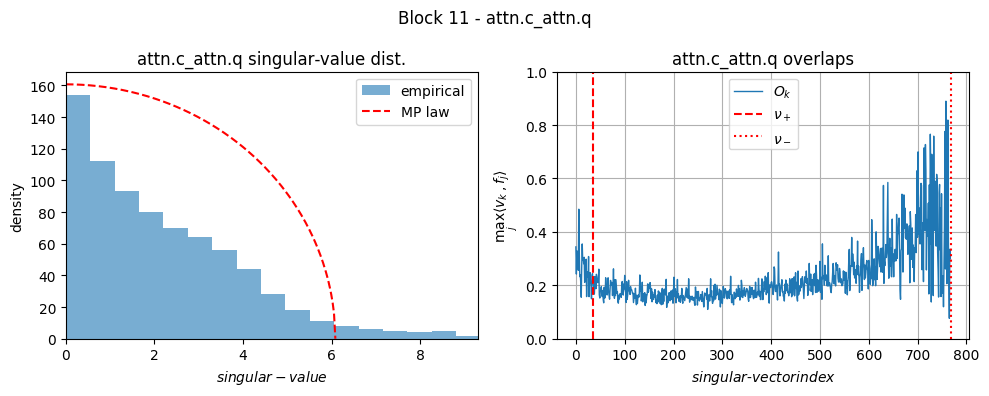

------------------------------

attn.c_attn.k shape: (768, 768)
buffer shape: (100, 600, 768)
cov mat shape: (768, 768)     eig vecs shape: (768, 768)
max rank: 768
svals shape: (768,)     rvecs shape: (768, 768)
# overlaps: (768,)
  attn.c_attn.k: 5.21% above ν+ = 5.85,	0.00% below ν− = 0.00


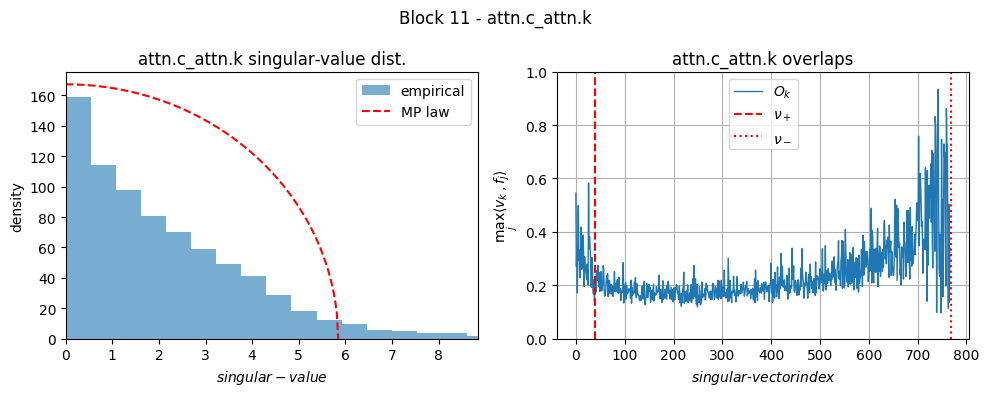

------------------------------

attn.c_attn.v shape: (768, 768)
buffer shape: (100, 600, 768)
cov mat shape: (768, 768)     eig vecs shape: (768, 768)
max rank: 768
svals shape: (768,)     rvecs shape: (768, 768)
# overlaps: (768,)
  attn.c_attn.v: 5.08% above ν+ = 8.99,	0.00% below ν− = 0.00


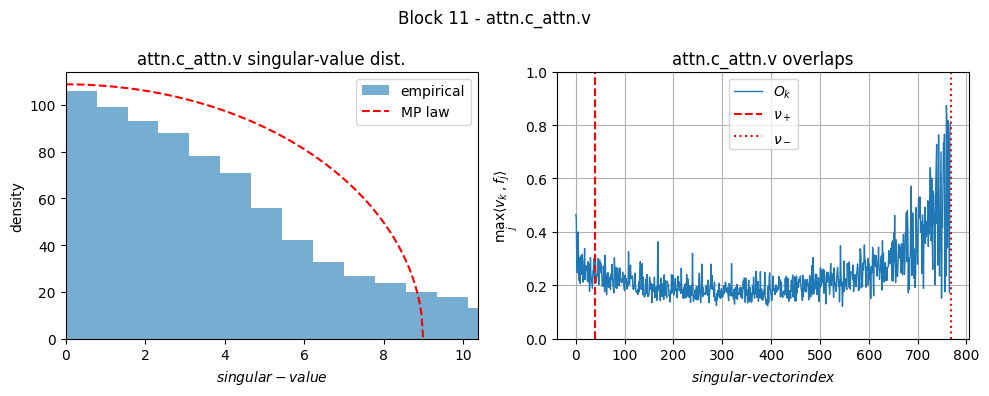

------------------------------

attn.c_proj shape: (768, 768)
buffer shape: (100, 600, 768)
cov mat shape: (768, 768)     eig vecs shape: (768, 768)
max rank: 768
svals shape: (768,)     rvecs shape: (768, 768)
# overlaps: (768,)
  attn.c_proj: 1.04% above ν+ = 10.08,	0.00% below ν− = 0.00


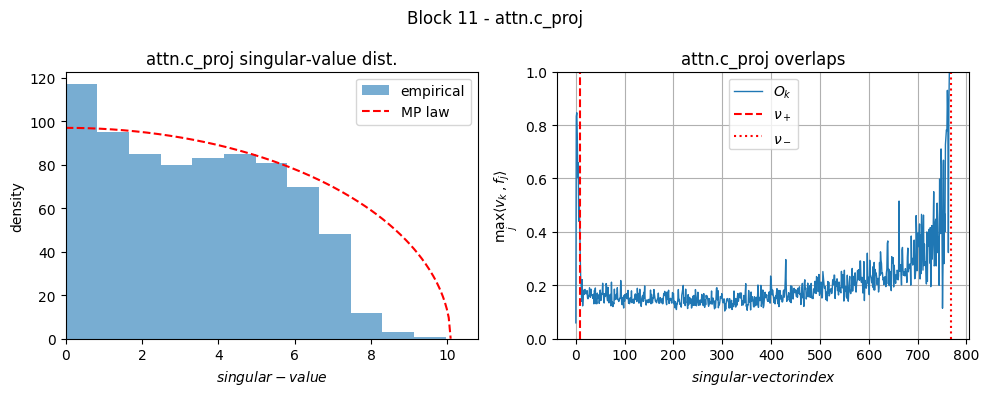

------------------------------

mlp.c_fc shape: (768, 3072)
buffer shape: (100, 600, 3072)
cov mat shape: (3072, 3072)     eig vecs shape: (3072, 3072)
max rank: 768
svals shape: (768,)     rvecs shape: (3072, 768)
# overlaps: (768,)
  mlp.c_fc: 7.55% above ν+ = 10.81,	12.37% below ν− = 3.60


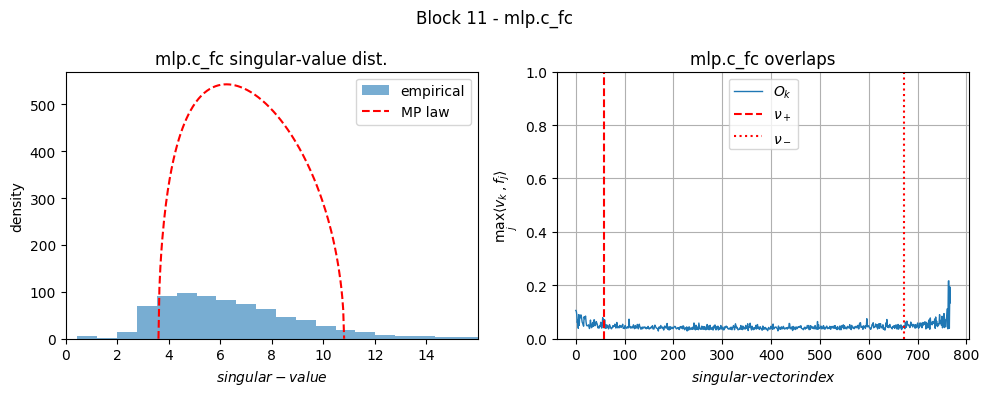

------------------------------

mlp.c_proj shape: (3072, 768)
buffer shape: (100, 600, 768)
cov mat shape: (768, 768)     eig vecs shape: (768, 768)
max rank: 768
svals shape: (768,)     rvecs shape: (768, 768)
# overlaps: (768,)
  mlp.c_proj: 4.95% above ν+ = 16.48,	8.33% below ν− = 5.49


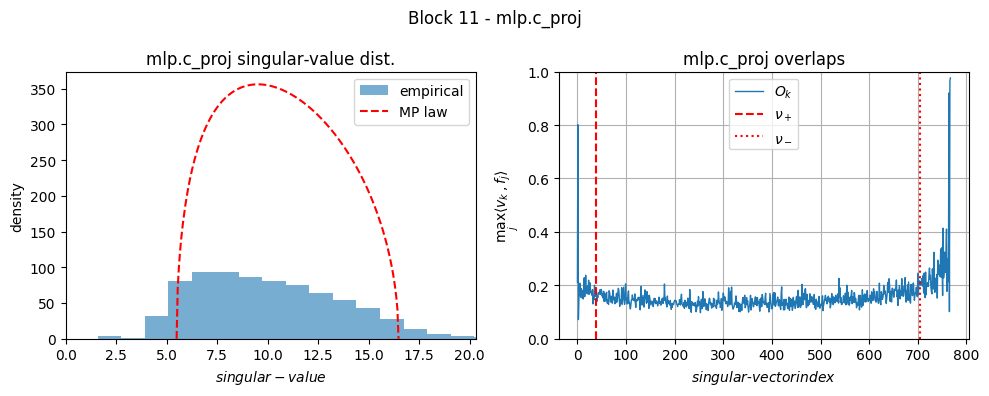

In [12]:
eps = 1e-8

for block_idx in range(N_BLOCKS):
    print("#####\n")
    print(f"BLOCK {block_idx}\n")
    print("#####\n")

    def slice_acts(key):
        """
        Function that returns all entries in `activations[key]` that correspond to the current `block_idx`
        """
        acts = activations[key]
        current_block_acts = []
        for i in range(n_prompts):
            selected_act = acts[i * N_BLOCKS + block_idx]
            n, d = selected_act.shape
            current_block_acts.append(selected_act.reshape(1,n,d))
        return torch.cat(current_block_acts, dim=0)
    

    # dict containing all weights and activations for each sublayer of the current `block_idx`
    sublayers = {
        sublayer: {"W": weights[f"h.{block_idx}.{sublayer}.weight"],"X": slice_acts(sublayer)} for sublayer in activations.keys()
    }

    # performs the decomposition and analysis of only the layers specified
    sublayer_selection = [
        "attn.c_attn.q",
        "attn.c_attn.k",
        "attn.c_attn.v",
        "attn.c_proj",
        "mlp.c_fc",
        "mlp.c_proj"
    ]

    for name, info in sublayers.items():
        if name not in sublayer_selection: continue
        
        # --- extract W and flattened X ---
        W = info["W"].cpu().numpy() # (m,n)
        X = info["X"].cpu().numpy() # buffers 
        # shape = (P, L, n), P: # prompts, L: # tokens, n: # dimensions
        P, L, n = X.shape
        N = P * L   # N: # configs per dim
        X_flat = X.reshape(N, n)

        print("------------------------------\n")
        print(      name, "shape:", W.shape,)
        print(      "buffer shape:", X.shape)

        # --- activation covariance in input space ---
        Xc = X_flat - X_flat.mean(axis=0, keepdims=True)
        F = (Xc.T @ Xc) / N     # activation covariance matrix size: (n, n)
        evals, evecs = np.linalg.eigh(F)
        idx = np.argsort(evals)[::-1]
        f_vals, f_vecs = evals[idx], evecs[:, idx]
        print( "cov mat shape:", F.shape, "   ", "eig vecs shape:", f_vecs.shape,)

        # --- SVD of W ---
        U, svals, Vt = np.linalg.svd(W, full_matrices=False)   # svals.shape=(r,), Vt=(r,n)
        max_rank = np.min(W.shape)
        print("max rank:", max_rank)
        print( "svals shape:", svals.shape, "   ", "rvecs shape:", Vt.T.shape,)

        # removing all eigenvalues we are sure to be 0
        w_svals = svals[:max_rank]
        w_rvecs = Vt[:max_rank,:max_rank]

        # and the corresponding eigenvectors in the act_cov
        f_vals = f_vals[:max_rank]
        f_vecs = f_vecs[:max_rank,:max_rank]

        # --- overlap --- Vt (r,n) @ f_vecs (n, n)
        overlaps = np.max(w_rvecs @ f_vecs, axis=1)   # O_k
        print("# overlaps:", overlaps.shape)

        # --- MP bounds ---
        m, n = W.shape
        a = max(m, n)
        b = min(m, n)
        q = b/a
        #sigma = np.std(W)*np.sqrt(a)
        sigma2 = np.mean((W - W.mean())**2)
        sigma  = np.sqrt(sigma2)
        lam_min = sigma*abs(np.sqrt(n)-np.sqrt(m))
        lam_max = sigma*(np.sqrt(n)+np.sqrt(m))

        # --- report fraction of outliers ---
        s_desc = np.sort(w_svals)[::-1]
        frac_hi = np.sum(s_desc > lam_max) / s_desc.shape[0]
        frac_lo = np.sum(s_desc < lam_min) / s_desc.shape[0]
        print(f"  {name}: {100*frac_hi:.2f}% above ν+ = {lam_max:.2f},\t{100*frac_lo:.2f}% below ν− = {lam_min:.2f}")

        # --- MP‐PDF (clamp lower edge to eps) ---
        lam0 = max(lam_min, eps)
        lam_grid = np.linspace(lam0, lam_max, 200)
        pdf = (1/(np.pi * sigma2 * q * lam_grid)) * np.sqrt( (lam_max**2 - lam_grid**2)*(lam_grid**2 - lam_min**2) )

        # --- find index‐boundaries ν+, ν- ---
        nu_plus  = (s_desc > lam_max).sum()
        nu_minus = (s_desc < lam_min).sum()

        # --- plotting ---
        fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
        # histogram + MP
        ax1.hist(s_desc, bins="fd", density=False, alpha=0.6, label='empirical')    # if density divide MP pdf by a=max(m,n)
        ax1.plot(lam_grid, pdf, 'r--', label='MP law')
        ax1.set_xlim(0, np.quantile(s_desc, 0.99))
        ax1.set_title(f"{name} singular‐value dist.")
        ax1.set_xlabel(r"$singular-value$")
        ax1.set_ylabel("density")
        ax1.legend()

        # overlap + vertical ν lines
        ax2.plot(overlaps, lw=1, label=r"$O_k$")
        ax2.axvline(nu_plus,  color='r', ls='--', label=r'$\nu_+$')
        ax2.axvline(max_rank - nu_minus, color='r', ls=':', label=r'$\nu_-$')
        ax2.set_ylim(0,1)
        ax2.set_title(f"{name} overlaps")
        ax2.set_xlabel(r"$singular‐vector index$")
        ax2.set_ylabel(r"$\max_j\langle v_k,f_j\rangle$")
        ax2.legend()
        ax2.grid(True)

        plt.suptitle(f"Block {block_idx} - {name}")
        plt.tight_layout()
        plt.show()

NB: all'uscita dell'ultimo MLP maggiore overlap su singular values piccoli (ovver attenuazione direzioni).